In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob
import Bio
from statannotations.Annotator import Annotator

In [188]:
np.__path__


['/home/tian/anaconda3/lib/python3.6/site-packages/numpy']

In [130]:
peter_shell_theta = {}
for kaks in glob.glob("*.kaks"):
    with open(kaks) as ofh:
        cols = []
        for line in ofh:
            line = line.strip()
            if line.startswith("Sequence"):
                continue
            if line.split("\t")[2] == "NA":
                cols.append(0)
                cols.append(0)
                cols.append(0)
                cols.append(1)
                cols.append(0)
                cols.append(line.split("\t")[16])
                cols.append(line.split("\t")[17])
                cols.append("core_whole")
                shell_whole[kaks.split(".")[0]] = cols
            else:
                cols.append(float(line.split("\t")[2]))
                cols.append(float(line.split("\t")[3]))
                cols.append(float(line.split("\t")[4]))
                cols.append(float(line.split("\t")[5]))
                cols.append(float(line.split("\t")[15]))
                cols.append(line.split("\t")[16])
                cols.append(line.split("\t")[17])
                cols.append("core_whole")
                shell_whole[kaks.split(".")[0]] = cols
        
        

In [220]:
#peter_shell_theta = {}
peter_core_theta = {}
with open("peter_theta.tab") as ofh:
    
    for line in ofh:
        cols = []
        if line.startswith(';'):
            line = line.strip()
            cols.append(float(line.split("\t")[1])) #total seg sites
            cols.append(float(line.split("\t")[2])) # seq numbers
            cols.append(float(line.split("\t")[3])) #seq length
            cols.append(float(line.split("\t")[4]))  #a_N
            cols.append(float(line.split("\t")[5])) #w_t
            cols.append(float(line.split("\t")[6])) #N_e
            peter_core_theta[line.split("\t")[0][1:-15]] = cols
            
#peter_shell_theta
peter_core_theta
            
            
            
            


{'1390.': [2593.0,
  77.0,
  1929.0,
  4.91451352528989,
  0.273520419892923,
  13676020.9946461],
 '1609.': [419.0,
  131.0,
  387.0,
  5.44859133826598,
  0.198709587723615,
  9935479.38618075],
 '1611.': [641.0,
  114.0,
  483.0,
  5.30902173620368,
  0.249974895404759,
  12498744.770238],
 '1619.': [261.0,
  89.0,
  396.0,
  5.06022353668122,
  0.130249366320125,
  6512468.31600623],
 '1632.': [329.0,
  87.0,
  408.0,
  5.03736564744402,
  0.160078224503866,
  8003911.22519331],
 '1643.': [1519.0,
  152.0,
  564.0,
  5.59780310520017,
  0.481128464280133,
  24056423.2140066],
 '1942.': [467.0,
  68.0,
  411.0,
  4.78935240737623,
  0.237245653423321,
  11862282.6711661],
 '279.': [519.0,
  128.0,
  495.0,
  5.42533459258917,
  0.193257177154943,
  9662858.85774717],
 '2816.': [8.0,
  55.0,
  591.0,
  4.57543039374427,
  0.00295849304955443,
  147924.652477722],
 '2962.': [12.0,
  53.0,
  210.0,
  4.53804395069745,
  0.0125919576283687,
  629597.881418435],
 '3254.': [561.0,
  62.0,

In [222]:
peter_core = pd.DataFrame.from_dict(peter_core_theta, orient="index", columns=["segs", "seqs", "seq_len", "a_N", "w_t", "N_e"
                                                                              ])
peter_shell = pd.DataFrame.from_dict(peter_shell_theta, orient="index", columns=["segs", "seqs", "seq_len", "a_N", "w_t", "N_e"
                                                                              ])
peter_all_thetas = pd.concat([peter_core, peter_shell])
peter_all_thetas


segs   seqs  seq_len       a_N       w_t           N_e
1390.   2593.0   77.0   1929.0  4.914514  0.273520  1.367602e+07
1609.    419.0  131.0    387.0  5.448591  0.198710  9.935479e+06
1611.    641.0  114.0    483.0  5.309022  0.249975  1.249874e+07
1619.    261.0   89.0    396.0  5.060224  0.130249  6.512468e+06
1632.    329.0   87.0    408.0  5.037366  0.160078  8.003911e+06
...        ...    ...      ...       ...       ...           ...
97236.     3.0   17.0   1056.0  3.380729  0.000840  4.201622e+04
97258.     9.0    6.0    144.0  2.283333  0.027372  1.368613e+06
9919.      0.0    4.0    363.0  1.833333  0.000000  0.000000e+00
99916.    68.0   20.0    513.0  3.547740  0.037363  1.868142e+06
99917.     5.0   19.0    891.0  3.495108  0.001606  8.027895e+04

[5899 rows x 6 columns]

In [251]:
peter_all_thetas

segs   seqs  seq_len       a_N       w_t           N_e
1390.   2593.0   77.0   1929.0  4.914514  0.273520  1.367602e+07
1609.    419.0  131.0    387.0  5.448591  0.198710  9.935479e+06
1611.    641.0  114.0    483.0  5.309022  0.249975  1.249874e+07
1619.    261.0   89.0    396.0  5.060224  0.130249  6.512468e+06
1632.    329.0   87.0    408.0  5.037366  0.160078  8.003911e+06
...        ...    ...      ...       ...       ...           ...
97236.     3.0   17.0   1056.0  3.380729  0.000840  4.201622e+04
97258.     9.0    6.0    144.0  2.283333  0.027372  1.368613e+06
9919.      0.0    4.0    363.0  1.833333  0.000000  0.000000e+00
99916.    68.0   20.0    513.0  3.547740  0.037363  1.868142e+06
99917.     5.0   19.0    891.0  3.495108  0.001606  8.027895e+04

[5899 rows x 6 columns]

In [223]:
peter_all_thetas.to_csv("peter_all_thetas.tab", sep="\t")

In [ ]:
len(shell_whole)

In [218]:
cd /media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/core/codon_seqs

/media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/core/codon_seqs


In [131]:
shell_all_frame = pd.DataFrame.from_dict(shell_whole, orient="index", columns=['Ka', 'Ks', 'Ka/Ks', 'P-val', 'Div-time', 'ratemat', 'GC', "sec"])
shell_all_frame

Ka        Ks     Ka/Ks          P-val  Div-time  \
1390   0.963830  1.152940  0.835974  1.972080e-233  1.000000   
1609   0.957214  1.159470  0.825565  2.846390e-102  1.000000   
1611   0.627930  2.301460  0.272840   0.000000e+00  1.000000   
1619   0.981322  1.068320  0.918568   3.822720e-14  1.000000   
1632   1.003340  0.990452  1.013010   2.810360e-01  1.000000   
...         ...       ...       ...            ...       ...   
77327  0.001573  0.133894  0.011749  6.354150e-150  0.011002   
77334  0.001633  0.048216  0.033874   7.003090e-96  0.009765   
77341  0.000962  0.017228  0.055868   3.330240e-14  0.004024   
77349  0.000464  0.078352  0.005921   3.018370e-69  0.009194   
77360  0.011019  0.331365  0.033254   0.000000e+00  0.043514   

                                             ratemat  \
1390   0.992975:0.848755:0.777257:0.864882:1.05886:1   
1609      1.41161:1.18601:0.458667:0.985319:1.2852:1   
1611     1.06507:1.39883:0.193763:0.69743:0.986847:1   
1619      1.2146:0.986444:0.69278:0.914857:1.16848:1   
1632      1.26272:1.26097:1.04841:1.24539:0.688177:1   
...                                              ...   
77327             7.23133:30:0.03194:0.167055:0.01:1   
77334       20.1158:11.641:29.3204:1.43561:1.68197:1   
77341   29.0951:0.898426:0.010003:0.010003:15.9278:1   
77349         10.5761:9.13755:5.11613:5.18486:0.01:1   
77360  1.77895:2.95197:0.0102947:0.586297:0.698334:1   

                                         GC         sec  
1390   0.614226(0.671238:0.415787:0.755654)  core_whole  
1609    0.590748(0.665553:0.37834:0.728352)  core_whole  
1611   0.618485(0.701591:0.442901:0.710962)  core_whole  
1619   0.593378(0.677051:0.400494:0.702588)  core_whole  
1632   0.576234(0.707742:0.396467:0.624493)  core_whole  
...                                     ...         ...  
77327   0.709783(0.701634:0.460925:0.96679)  core_whole  
77334  0.691229(0.713738:0.505542:0.854406)  core_whole  
77341  0.716688(0.850094:0.394737:0.905232)  core_whole  
77349   0.71677(0.773758:0.417236:0.959317)  core_whole  
77360    0.721838(0.74555:0.470375:0.94959)  core_whole  

[2553 rows x 8 columns]

### Random Workspace

In [132]:
shell_all_frame.to_csv("whole_core.tab", sep="\t")

In [ ]:
cd /media/tian/Backup_Protected/working/halo_pg/shared_content/sigP_separated/sec_shell/kaks_out

In [ ]:
#rate mat def: (rTC:rAG:rTA:rCG:rTG:rCA/rCA)
#P-val (Fisher's exact test [Zhang et al. (1997).] null hypothesis is neutraility (if >0.05 reject the kaks (cannot reject null))])
all_dnds = pd.DataFrame.from_dict(all_dict, orient="index", 
                                  columns=['Ka', 'Ks', 'Ka/Ks', 'P-val', 'Div-time', 'ratemat', 'GC', "sec"])
all_dnds

In [ ]:
shell_and_sec = pd.read_csv("/media/tian/Backup_Protected/working/halo_pg/shared_content/all_dnds_sofar_sanscore.tab.csv",
                            sep="\t", index_col=0)
shell_and_sec

In [ ]:
#no_high = shell_and_sec.loc[shell_and_sec['Ks'] < 1.5 ]
#only_sigs = no_high.loc[no_high['P-val'] < 0.05]
only_sigs

In [ ]:
only_sigs.loc[only_sigs["Ka"] < 1.5]

In [ ]:
#plot ideas- Ka/Ks vs GC
#GC vs rate mat? 
## rate matrix split up then ordination?
## overall Ka vs Ks scatter with colorings
# look for other pairings?
sns.relplot(x="Ka", y="Ks", data=shell_and_sec, hue="sec")


In [ ]:
sns.re

In [ ]:
combo_dnds.to_csv("combo_dnds.tab", sep="\t")

In [ ]:
combo_dnds_sec = pd.read_csv("/media/tian/Backup_Protected/working/halo_pg/shared_content/combo_dnds.tab", sep="\t", index_col=0)
combo_dnds_sec

In [69]:
cd /media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/core/round_two_inc/incomplete2/gear_turd/

/media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/core/round_two_inc/incomplete2/gear_turd


### Alignment column deleter

In [70]:
##fix dumbass KaKS calc
from Bio import SeqIO

for secs in glob.glob("*.prot22"):

    original_file = secs
    extended_file = secs + '2'

    with open(original_file) as original, open(extended_file, 'w') as extended:
        records = SeqIO.parse(original_file, 'fasta')
        for record in records:
        
            record.seq = record.seq[:-1]
        
            SeqIO.write(record, extended, 'fasta')

###########Convert to axt:
# for f in *.prot222; do perl /media/tian/Backup_Protected/KaKs_Calculator1.2/parseFastaIntoAXT.pl $f ;done
############## pipe to KaKs calculator
#for f in *.axt; do /media/tian/Backup_Protected/KaKs_Calculator2.0/bin/Linux/KaKs_Calculator -i $f -o $f.kaks; done


In [123]:
cd /media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions

/media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions


In [107]:
pwd

'/media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/shell/translation'

In [8]:
import Bio
from Bio import SeqIO
SeqIO.__path__

['/home/tian/anaconda3/lib/python3.6/site-packages/Bio/SeqIO']

## Count Seg Sites inprotein alignment

In [121]:
for prot in glob.glob("*.faa"):
    #print(prot)
    with open(prot) as FILE:
        parser = next(SeqIO.parse(FILE, 'fasta' ))
        seq_len = len(parser.seq)
        base_counts = [{ 'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0, 'X':0} for _ in str(parser.seq)]
    
            
    with open(prot) as FILE:
    
        for seq in SeqIO.parse(FILE, 'fasta' ):
            for position,base in enumerate(str(seq.seq.upper())):
               base_counts[position][base] += 1
        
    seq_nums = sum(base_counts[0].values())

    seg_sites = 0
    for column, acid in enumerate(base_counts):
        if seq_nums not in acid.values():
            seg_sites += 1
            #print(column)
        
    print("{} \t {} \t {} \t {}".format(prot.split(".")[0], seg_sites, seq_nums, seq_len), 
          file=open("prot_nonysn_shell.tab", "a"))
    #seg_sites


        


### Samething but NT alignment

In [122]:
for prot in glob.glob("*.prot"):
    #print(prot)
    with open(prot) as FILE:
        parser = next(SeqIO.parse(FILE, 'fasta' ))
        seq_len = len(parser.seq)
        base_counts = [{ 'A': 0, 'C': 0, 'G': 0, 'T': 0, "N" : 0} for _ in str(parser.seq)]
    
            
    with open(prot) as FILE:
    
        for seq in SeqIO.parse(FILE, 'fasta' ):
            for position,base in enumerate(str(seq.seq.upper())):
               base_counts[position][base] += 1
        
    seq_nums = sum(base_counts[0].values())

    seg_sites = 0
    for column, acid in enumerate(base_counts):
        if seq_nums not in acid.values():
            seg_sites += 1
            #print(column)
        
    print("{} \t {} \t {} \t {}".format(prot.split(".")[0], seg_sites, seq_nums, seq_len), 
          file=open("prot_tot_sites_core.tab", "a"))

### Script to translate aligned NT to AA (better if they are codon aligned)

In [105]:
#from Bio import AlignIO
#from Bio.Align import MultipleSeqAlignment
#from Bio.SeqRecord import SeqRecord
#from Bio import translate

for codeon in glob.glob("*.prot"):
    parser = AlignIO.read(codeon, 'fasta' )
    empty_align = []
    for record in parser:
        #print(len(record.seq))
        empty_align.append(SeqRecord(record.seq.translate(), id=record.id))
        trans_align = MultipleSeqAlignment(empty_align)
        AlignIO.write(trans_align, codeon[:-5]+".faa", "fasta")

## Read in the stuff from 1-1.2

In [126]:
core_counting = pd.read_csv("core_dnds_count.tab.csv", sep="\t", header=0)
core_counting

ID  nonsynon  seqs  len  len_check  segs  nt_len  synon     ratio
0       279       132   128  165          3   345     495    213  0.619718
1       658         5    55  302          3    20     906     15  0.333333
2      1390       514    77  643          3  1500    1929    986  0.521298
3      1609       105   131  129          3   279     387    174  0.603448
4      1611       139   114  161          3   383     483    244  0.569672
...     ...       ...   ...  ...        ...   ...     ...    ...       ...
2549  77370        86    66  160          3   276     480    190  0.452632
2550  77372        86    63  239          3   267     717    181  0.475138
2551  77373        42    61  144          3   135     432     93  0.451613
2552  77375         5    60  118          3    37     354     32  0.156250
2553  77376        23    60  396          3   143    1188    120  0.191667

[2554 rows x 9 columns]

In [128]:
counting_all = pd.concat([core_counting, shell_counting])
counting_all

ID  nonsynon  seqs  len  len_check  segs  nt_len  synon       ratio
0        279       132   128  165          3   345     495    213    0.619718
1        658         5    55  302          3    20     906     15    0.333333
2       1390       514    77  643          3  1500    1929    986    0.521298
3       1609       105   131  129          3   279     387    174    0.603448
4       1611       139   114  161          3   383     483    244    0.569672
...      ...       ...   ...  ...        ...   ...     ...    ...         ...
3340  155027         0     3   29          3     0      87      0  999.000000
3341  158019         0     3  182          3     0     546      0  999.000000
3342  186023         0     4   66          3     0     198      0  999.000000
3343  186816         0     4  300          3     0     900      0  999.000000
3344  186817         0     4   67          3     0     201      0  999.000000

[5899 rows x 9 columns]

In [145]:
kaks = pd.read_csv("all_dnds_kaks.tab.csv", sep="\t", header=0)
kaks

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0     74140  0.083341  0.498066  0.167329   0.000000e+00  0.192816   
1     74142  0.214718  0.469520  0.457315   0.000000e+00  0.293206   
2     74144  1.024070  0.932205  1.098550   8.542420e-26  1.000000   
3     74178  0.977397  1.067170  0.915881   1.119860e-15  1.000000   
4     74218  0.999265  1.001820  0.997446   7.961470e-01  1.000000   
...     ...       ...       ...       ...            ...       ...   
6069  77327  0.001573  0.133894  0.011749  6.354150e-150  0.011002   
6070  77334  0.001633  0.048216  0.033874   7.003090e-96  0.009765   
6071  77341  0.000962  0.017228  0.055868   3.330240e-14  0.004024   
6072  77349  0.000464  0.078352  0.005921   3.018370e-69  0.009194   
6073  77360  0.011019  0.331365  0.033254   0.000000e+00  0.043514   

                                            ratemat  \
0         2.86255:4.4242:0.832253:1.72514:1.24507:1   
1        1.46869:2.18029:0.56389:1.06206:0.708665:1   
2        1.5085:0.976026:1.05219:1.38237:0.818461:1   
3     0.939095:0.821862:0.664388:0.735798:1.10886:1   
4       0.854412:1.38763:0.682002:0.82293:1.01313:1   
...                                             ...   
6069             7.23133:30:0.03194:0.167055:0.01:1   
6070       20.1158:11.641:29.3204:1.43561:1.68197:1   
6071   29.0951:0.898426:0.010003:0.010003:15.9278:1   
6072         10.5761:9.13755:5.11613:5.18486:0.01:1   
6073  1.77895:2.95197:0.0102947:0.586297:0.698334:1   

                                        GC         sec  
0     0.667884(0.702183:0.554683:0.746786)    sec_core  
1      0.646547(0.68804:0.588099:0.663502)    sec_core  
2     0.503756(0.524816:0.436351:0.550101)    sec_core  
3     0.556197(0.581836:0.453466:0.633291)    sec_core  
4     0.647809(0.688329:0.495762:0.759337)    sec_core  
...                                    ...         ...  
6069   0.709783(0.701634:0.460925:0.96679)  core_whole  
6070  0.691229(0.713738:0.505542:0.854406)  core_whole  
6071  0.716688(0.850094:0.394737:0.905232)  core_whole  
6072   0.71677(0.773758:0.417236:0.959317)  core_whole  
6073    0.721838(0.74555:0.470375:0.94959)  core_whole  

[6074 rows x 9 columns]

In [59]:
seg_sites = 0
for column, acid in enumerate(base_counts):
    if 42 not in acid.values():
        seg_sites += 1
        print(column)
        
seg_sites

29
89
105
130
144
146
148
161
200
201
206
215
259
263
275
277
281
400
616
644
656
693


22

In [146]:
kaks.ID

0       74140
1       74142
2       74144
3       74178
4       74218
        ...  
6069    77327
6070    77334
6071    77341
6072    77349
6073    77360
Name: ID, Length: 6074, dtype: int64

In [148]:
merged = pd.merge(kaks, counting_all, on="ID", how="inner")
merged

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0     74140  0.083341  0.498066  0.167329   0.000000e+00  0.192816   
1     74140  0.083341  0.498066  0.167329   0.000000e+00  0.192816   
2     74142  0.214718  0.469520  0.457315   0.000000e+00  0.293206   
3     74142  0.214718  0.469520  0.457315   0.000000e+00  0.293206   
4     74144  1.024070  0.932205  1.098550   8.542420e-26  1.000000   
...     ...       ...       ...       ...            ...       ...   
6069  77327  0.001573  0.133894  0.011749  6.354150e-150  0.011002   
6070  77334  0.001633  0.048216  0.033874   7.003090e-96  0.009765   
6071  77341  0.000962  0.017228  0.055868   3.330240e-14  0.004024   
6072  77349  0.000464  0.078352  0.005921   3.018370e-69  0.009194   
6073  77360  0.011019  0.331365  0.033254   0.000000e+00  0.043514   

                                            ratemat  \
0         2.86255:4.4242:0.832253:1.72514:1.24507:1   
1         2.86255:4.4242:0.832253:1.72514:1.24507:1   
2        1.46869:2.18029:0.56389:1.06206:0.708665:1   
3        1.46869:2.18029:0.56389:1.06206:0.708665:1   
4        1.5085:0.976026:1.05219:1.38237:0.818461:1   
...                                             ...   
6069             7.23133:30:0.03194:0.167055:0.01:1   
6070       20.1158:11.641:29.3204:1.43561:1.68197:1   
6071   29.0951:0.898426:0.010003:0.010003:15.9278:1   
6072         10.5761:9.13755:5.11613:5.18486:0.01:1   
6073  1.77895:2.95197:0.0102947:0.586297:0.698334:1   

                                        GC         sec  nonsynon  seqs  len  \
0     0.667884(0.702183:0.554683:0.746786)    sec_core       102    72  350   
1     0.667884(0.702183:0.554683:0.746786)  core_whole       102    72  350   
2      0.646547(0.68804:0.588099:0.663502)    sec_core       196    72  373   
3      0.646547(0.68804:0.588099:0.663502)  core_whole       196    72  373   
4     0.503756(0.524816:0.436351:0.550101)    sec_core       101   105  142   
...                                    ...         ...       ...   ...  ...   
6069   0.709783(0.701634:0.460925:0.96679)  core_whole         4    56  271   
6070  0.691229(0.713738:0.505542:0.854406)  core_whole         6    56  261   
6071  0.716688(0.850094:0.394737:0.905232)  core_whole         3    56  114   
6072   0.71677(0.773758:0.417236:0.959317)  core_whole         3    56  115   
6073    0.721838(0.74555:0.470375:0.94959)  core_whole        34    56  305   

      len_check  segs  nt_len  synon     ratio  
0             3   319    1050    217  0.470046  
1             3   319    1050    217  0.470046  
2             3   501    1119    305  0.642623  
3             3   501    1119    305  0.642623  
4             3   264     426    163  0.619632  
...         ...   ...     ...    ...       ...  
6069          3    16     813     12  0.333333  
6070          3    20     783     14  0.428571  
6071          3     7     342      4  0.750000  
6072          3    16     345     13  0.230769  
6073          3   135     915    101  0.336634  

[6074 rows x 17 columns]

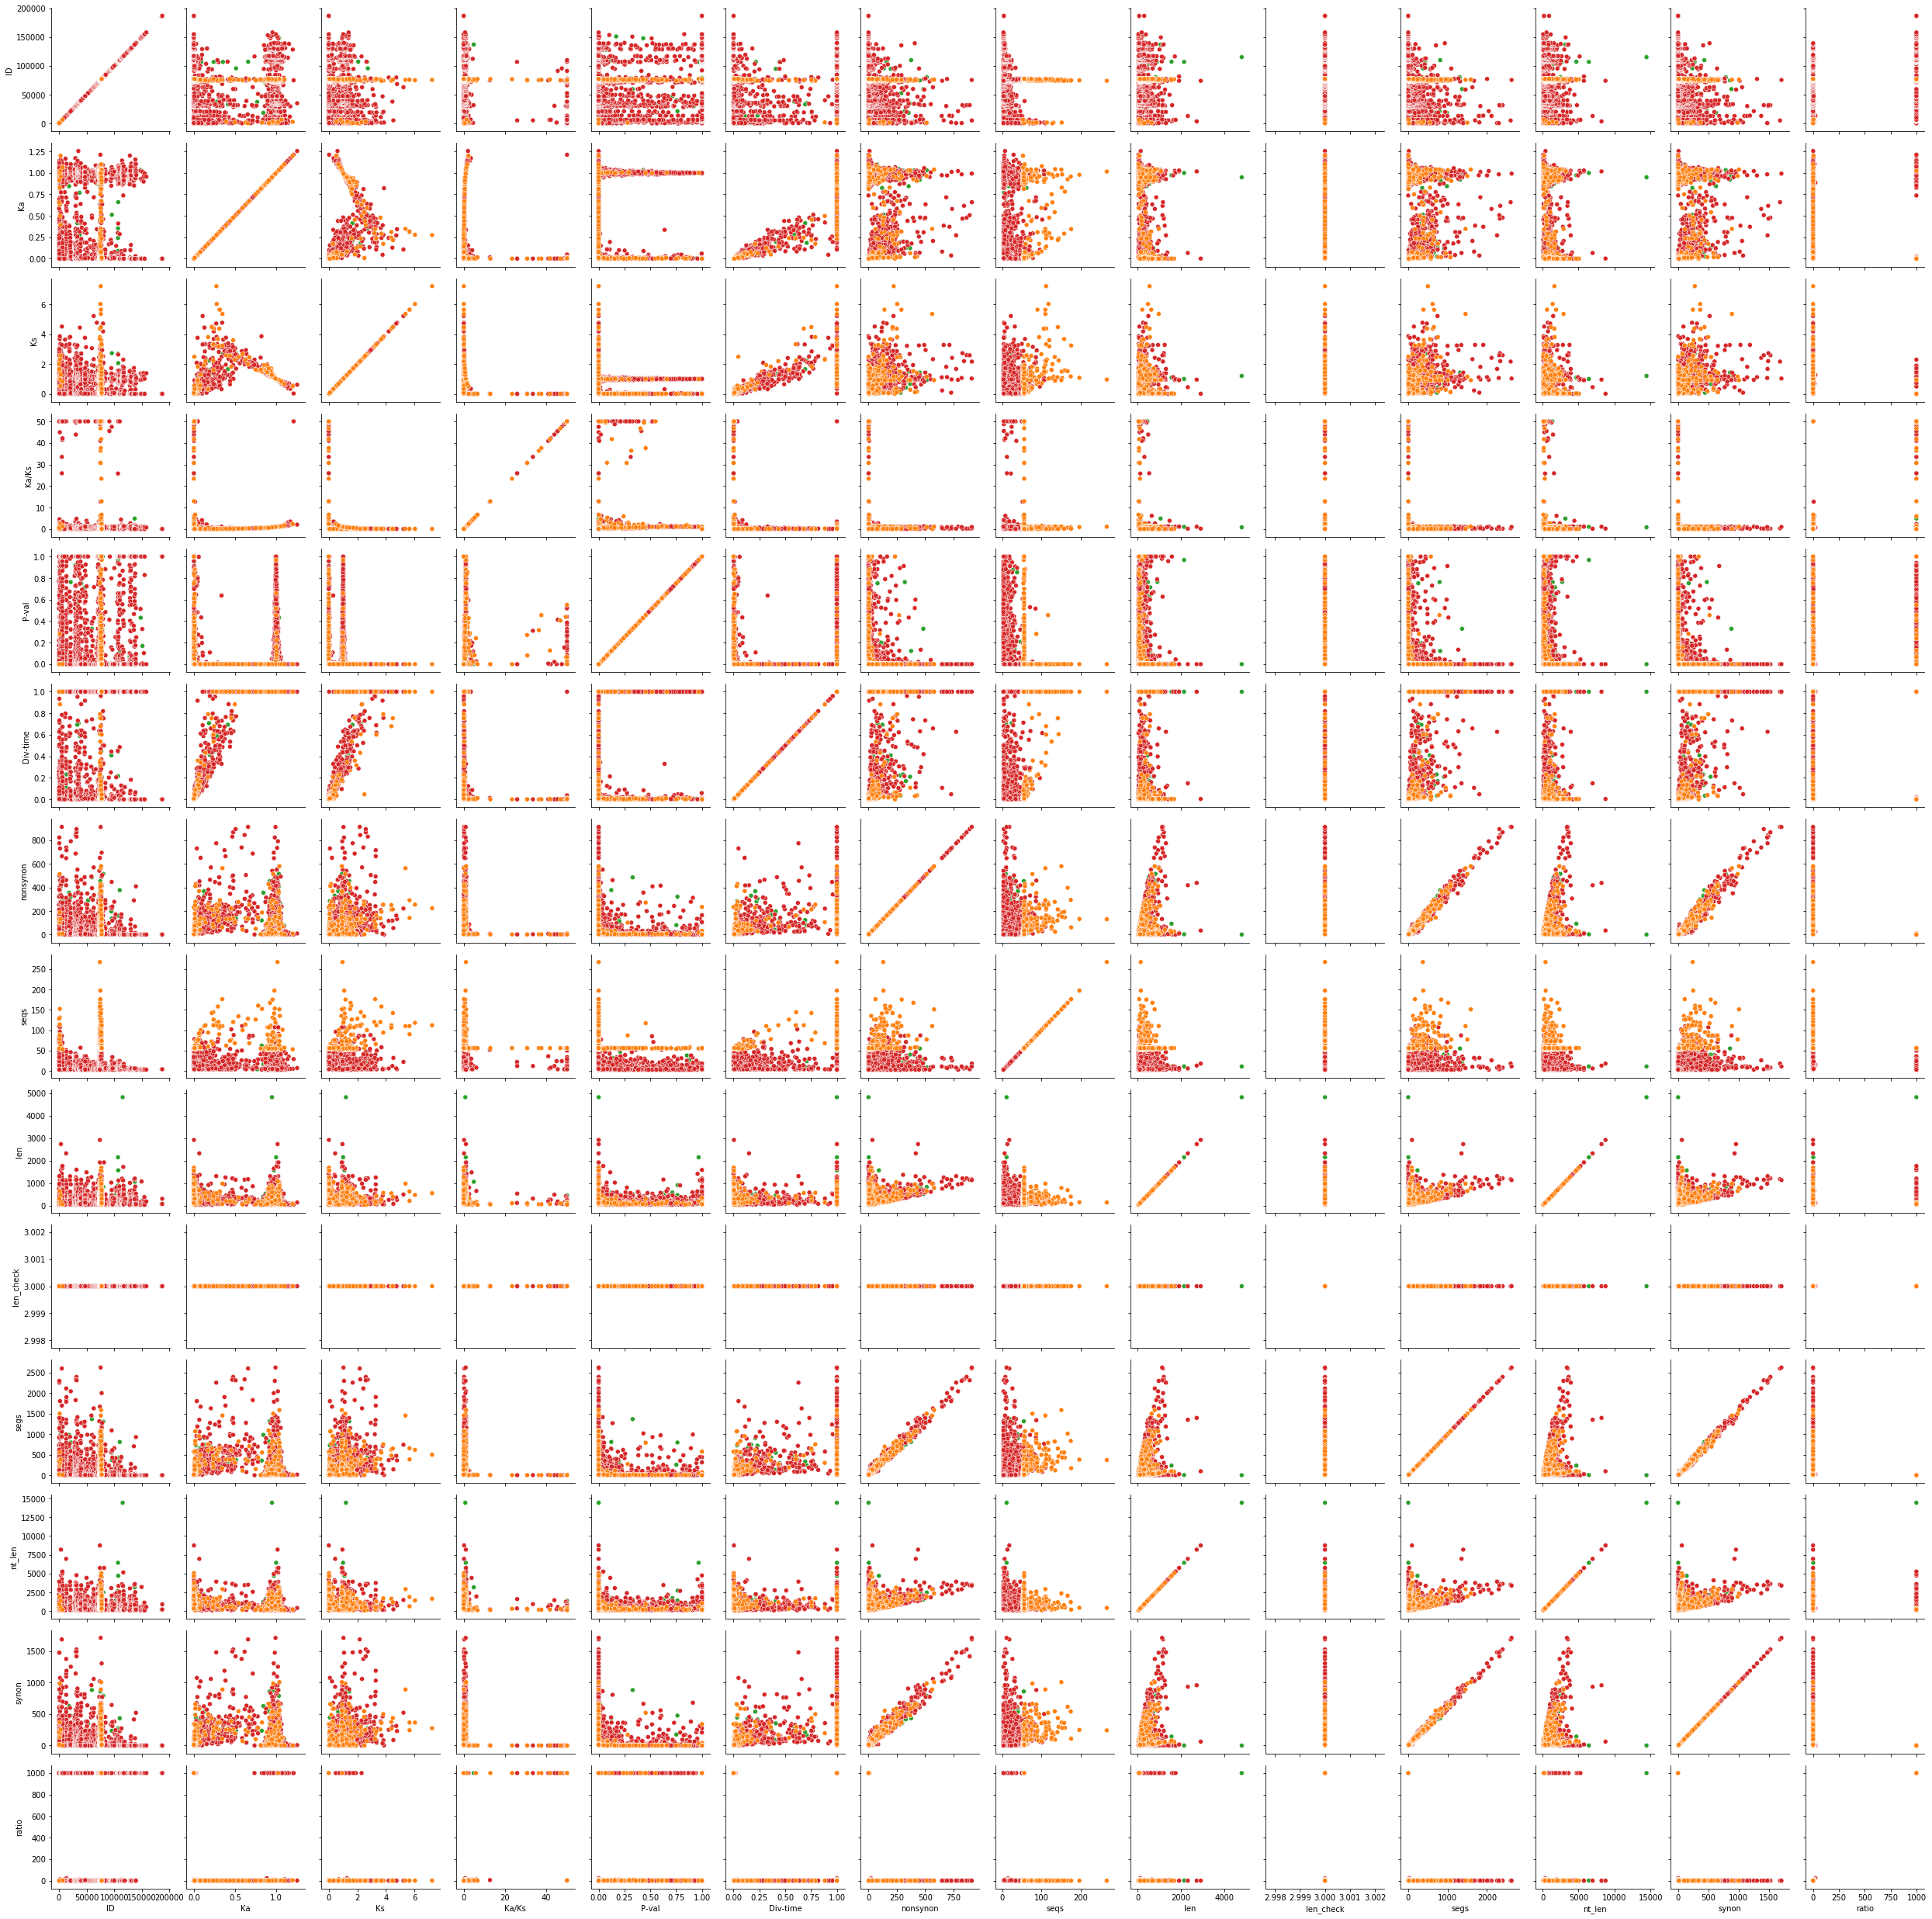

In [153]:
g = sns.PairGrid(merged, hue="sec")
g.map(sns.scatterplot)
g.savefig("pairgrid_unaltered_hewed.pdf")

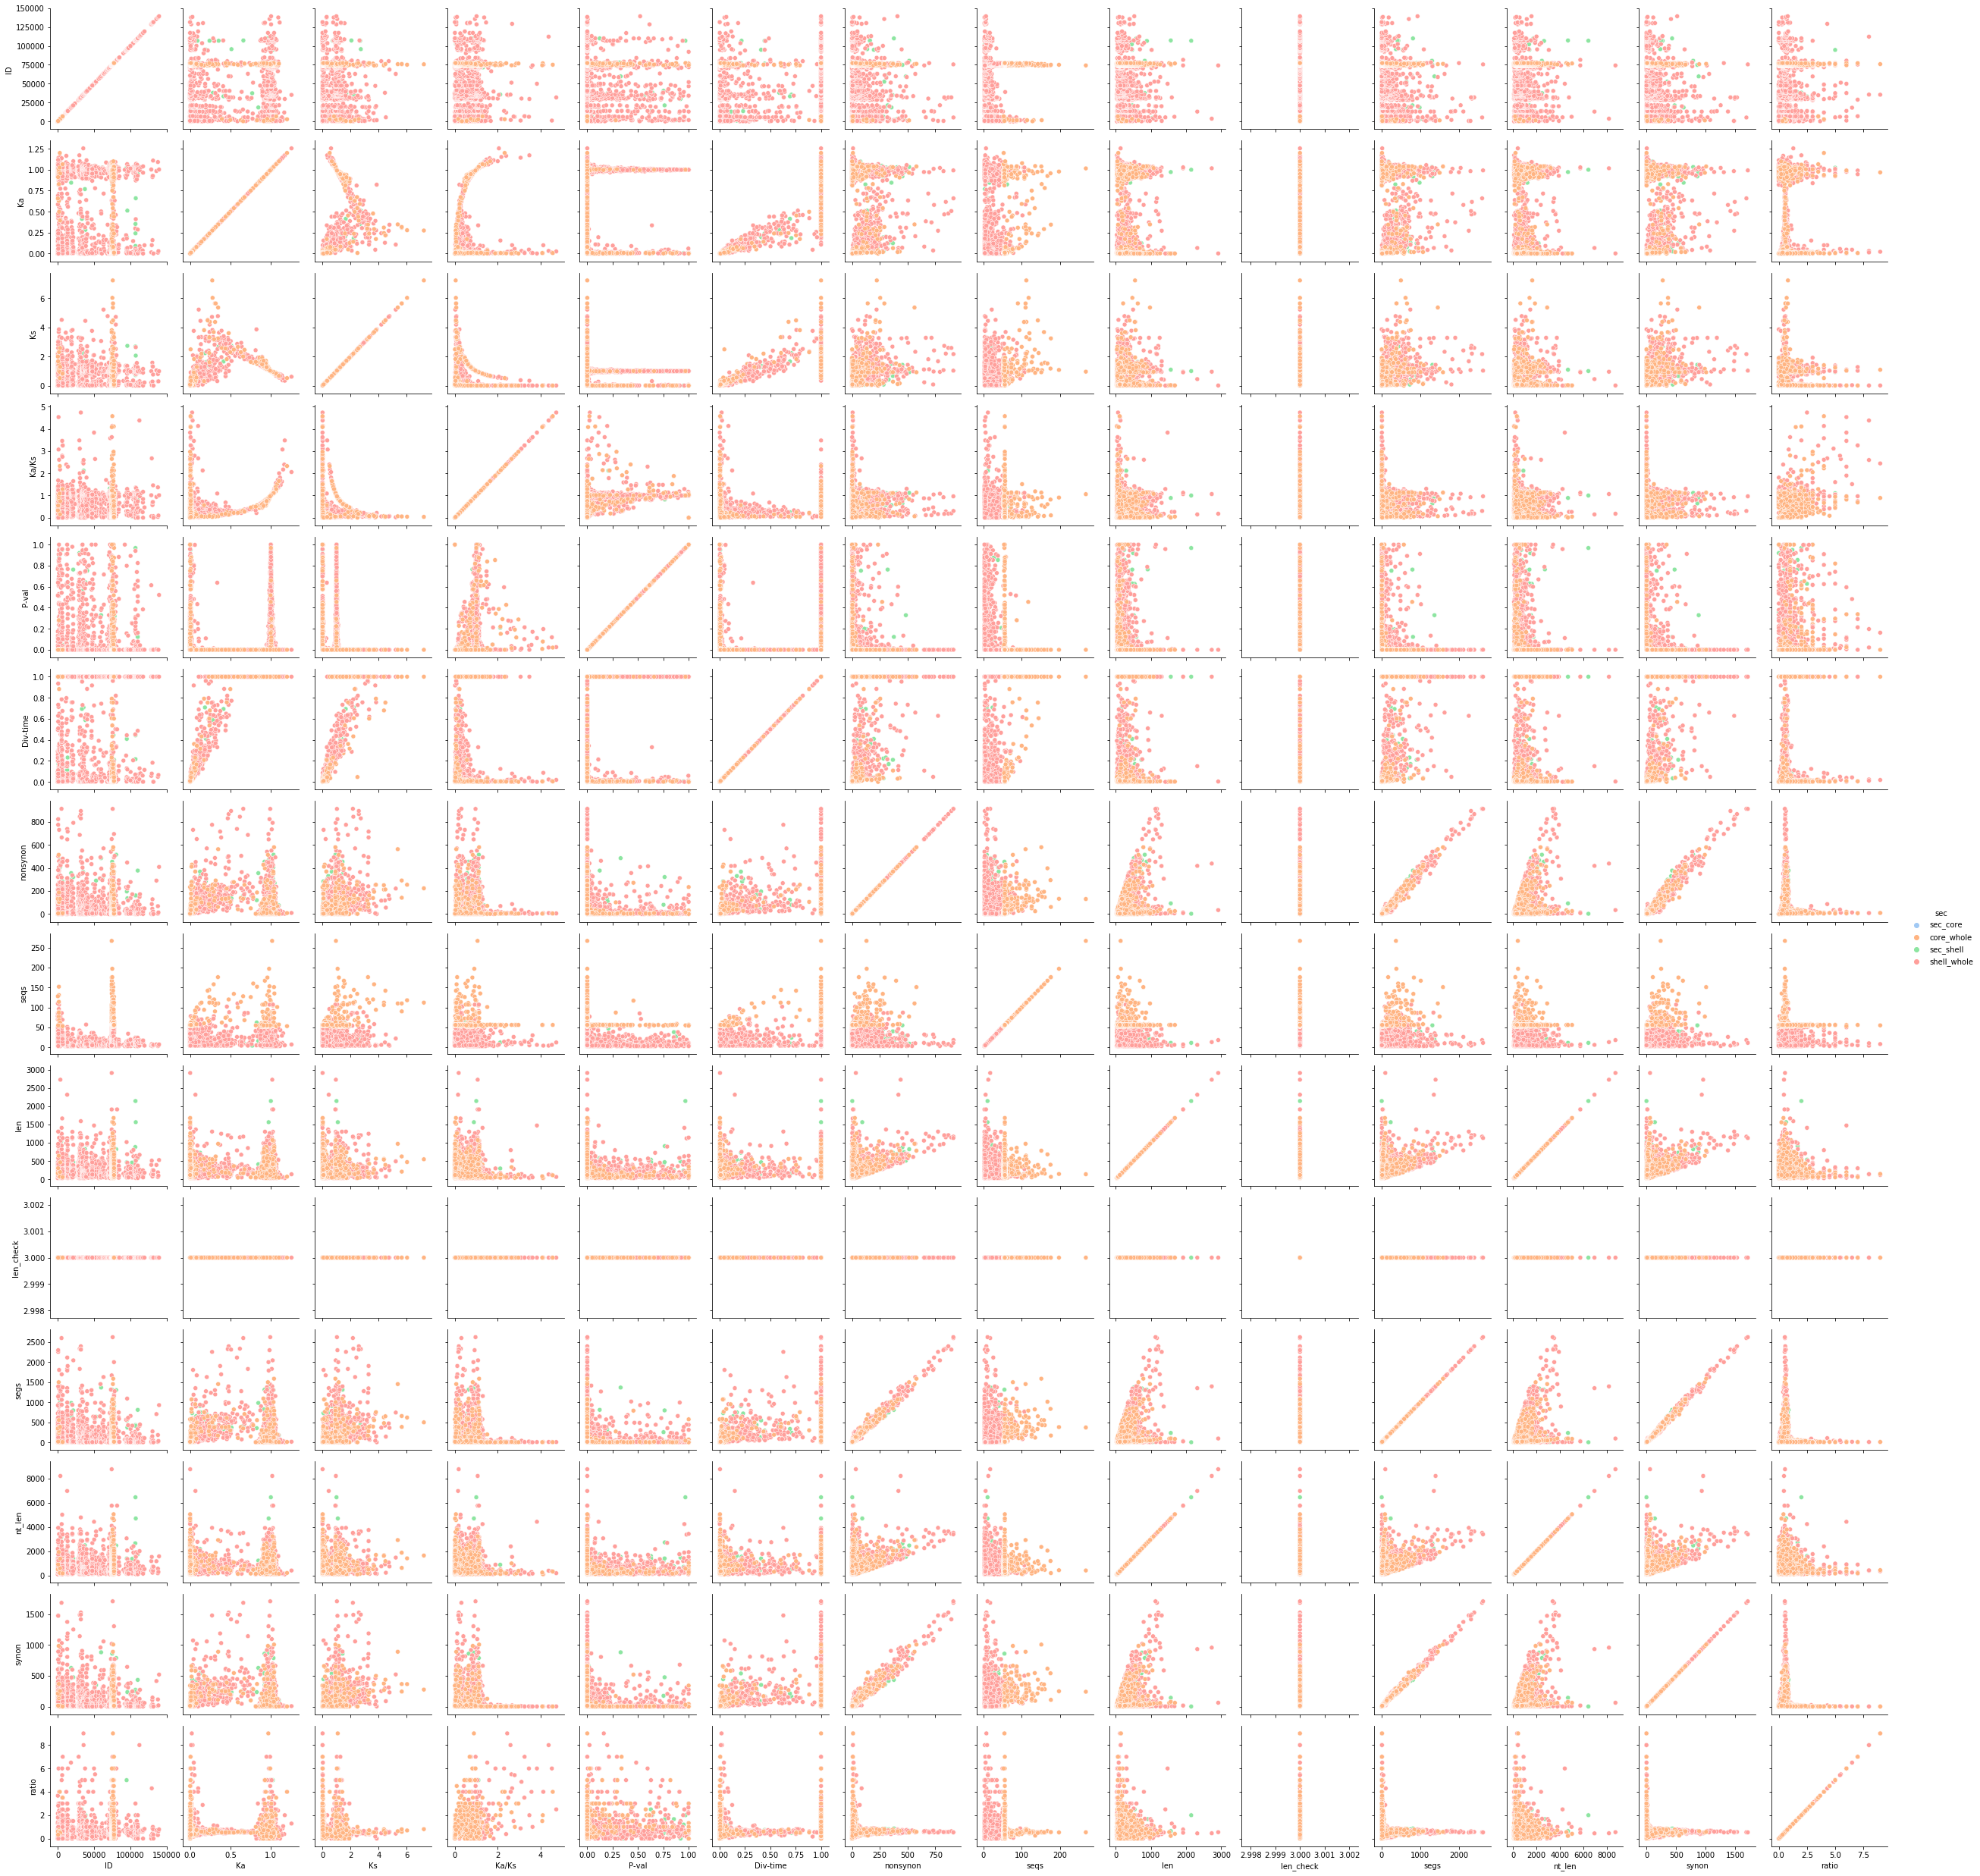

In [160]:
g = sns.PairGrid(smaller2, hue="sec", palette="pastel")
g.map(sns.scatterplot)
g.add_legend()
#g.savefig("pairgrid_smaller_huewed.pdf")

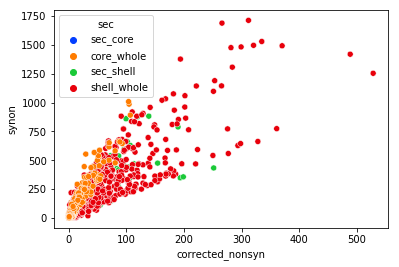

In [197]:
man = sns.scatterplot(data=smaller2, x="", y="synon", hue="sec", palette="bright")
fig = man.get_figure()
#fig.savefig("cor_valn_s_uncorrected.pdf", dpi=400)

In [245]:
smaller2.to_csv("all_table_measures.tab", sep="\t")

## NaNs

In [157]:
smaller1 = merged.loc[merged["ratio"] < 10]
smaller2 = smaller1.loc[smaller1['Ka/Ks'] < 5]
smaller2

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0     74140  0.083341  0.498066  0.167329   0.000000e+00  0.192816   
1     74140  0.083341  0.498066  0.167329   0.000000e+00  0.192816   
2     74142  0.214718  0.469520  0.457315   0.000000e+00  0.293206   
3     74142  0.214718  0.469520  0.457315   0.000000e+00  0.293206   
4     74144  1.024070  0.932205  1.098550   8.542420e-26  1.000000   
...     ...       ...       ...       ...            ...       ...   
6069  77327  0.001573  0.133894  0.011749  6.354150e-150  0.011002   
6070  77334  0.001633  0.048216  0.033874   7.003090e-96  0.009765   
6071  77341  0.000962  0.017228  0.055868   3.330240e-14  0.004024   
6072  77349  0.000464  0.078352  0.005921   3.018370e-69  0.009194   
6073  77360  0.011019  0.331365  0.033254   0.000000e+00  0.043514   

                                            ratemat  \
0         2.86255:4.4242:0.832253:1.72514:1.24507:1   
1         2.86255:4.4242:0.832253:1.72514:1.24507:1   
2        1.46869:2.18029:0.56389:1.06206:0.708665:1   
3        1.46869:2.18029:0.56389:1.06206:0.708665:1   
4        1.5085:0.976026:1.05219:1.38237:0.818461:1   
...                                             ...   
6069             7.23133:30:0.03194:0.167055:0.01:1   
6070       20.1158:11.641:29.3204:1.43561:1.68197:1   
6071   29.0951:0.898426:0.010003:0.010003:15.9278:1   
6072         10.5761:9.13755:5.11613:5.18486:0.01:1   
6073  1.77895:2.95197:0.0102947:0.586297:0.698334:1   

                                        GC         sec  nonsynon  seqs  len  \
0     0.667884(0.702183:0.554683:0.746786)    sec_core       102    72  350   
1     0.667884(0.702183:0.554683:0.746786)  core_whole       102    72  350   
2      0.646547(0.68804:0.588099:0.663502)    sec_core       196    72  373   
3      0.646547(0.68804:0.588099:0.663502)  core_whole       196    72  373   
4     0.503756(0.524816:0.436351:0.550101)    sec_core       101   105  142   
...                                    ...         ...       ...   ...  ...   
6069   0.709783(0.701634:0.460925:0.96679)  core_whole         4    56  271   
6070  0.691229(0.713738:0.505542:0.854406)  core_whole         6    56  261   
6071  0.716688(0.850094:0.394737:0.905232)  core_whole         3    56  114   
6072   0.71677(0.773758:0.417236:0.959317)  core_whole         3    56  115   
6073    0.721838(0.74555:0.470375:0.94959)  core_whole        34    56  305   

      len_check  segs  nt_len  synon     ratio  
0             3   319    1050    217  0.470046  
1             3   319    1050    217  0.470046  
2             3   501    1119    305  0.642623  
3             3   501    1119    305  0.642623  
4             3   264     426    163  0.619632  
...         ...   ...     ...    ...       ...  
6069          3    16     813     12  0.333333  
6070          3    20     783     14  0.428571  
6071          3     7     342      4  0.750000  
6072          3    16     345     13  0.230769  
6073          3   135     915    101  0.336634  

[5021 rows x 17 columns]

In [224]:
#smaller2['corrected_syn'] = 0.0
#smaller2['dN_noa'] = 0.0
#smaller2['dS_noa'] = 0.0
smaller2

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0     74140  0.083341  0.498066  0.167329   0.000000e+00  0.192816   
1     74140  0.083341  0.498066  0.167329   0.000000e+00  0.192816   
2     74142  0.214718  0.469520  0.457315   0.000000e+00  0.293206   
3     74142  0.214718  0.469520  0.457315   0.000000e+00  0.293206   
4     74144  1.024070  0.932205  1.098550   8.542420e-26  1.000000   
...     ...       ...       ...       ...            ...       ...   
6069  77327  0.001573  0.133894  0.011749  6.354150e-150  0.011002   
6070  77334  0.001633  0.048216  0.033874   7.003090e-96  0.009765   
6071  77341  0.000962  0.017228  0.055868   3.330240e-14  0.004024   
6072  77349  0.000464  0.078352  0.005921   3.018370e-69  0.009194   
6073  77360  0.011019  0.331365  0.033254   0.000000e+00  0.043514   

                                            ratemat  \
0         2.86255:4.4242:0.832253:1.72514:1.24507:1   
1         2.86255:4.4242:0.832253:1.72514:1.24507:1   
2        1.46869:2.18029:0.56389:1.06206:0.708665:1   
3        1.46869:2.18029:0.56389:1.06206:0.708665:1   
4        1.5085:0.976026:1.05219:1.38237:0.818461:1   
...                                             ...   
6069             7.23133:30:0.03194:0.167055:0.01:1   
6070       20.1158:11.641:29.3204:1.43561:1.68197:1   
6071   29.0951:0.898426:0.010003:0.010003:15.9278:1   
6072         10.5761:9.13755:5.11613:5.18486:0.01:1   
6073  1.77895:2.95197:0.0102947:0.586297:0.698334:1   

                                        GC         sec  nonsynon  ...  synon  \
0     0.667884(0.702183:0.554683:0.746786)    sec_core       102  ...    217   
1     0.667884(0.702183:0.554683:0.746786)  core_whole       102  ...    217   
2      0.646547(0.68804:0.588099:0.663502)    sec_core       196  ...    305   
3      0.646547(0.68804:0.588099:0.663502)  core_whole       196  ...    305   
4     0.503756(0.524816:0.436351:0.550101)    sec_core       101  ...    163   
...                                    ...         ...       ...  ...    ...   
6069   0.709783(0.701634:0.460925:0.96679)  core_whole         4  ...     12   
6070  0.691229(0.713738:0.505542:0.854406)  core_whole         6  ...     14   
6071  0.716688(0.850094:0.394737:0.905232)  core_whole         3  ...      4   
6072   0.71677(0.773758:0.417236:0.959317)  core_whole         3  ...     13   
6073    0.721838(0.74555:0.470375:0.94959)  core_whole        34  ...    101   

         ratio  corrected_nonsyn       theta       a_N  corrected_syn  \
0     0.470046         21.044287   65.814975  4.846921      44.770688   
1     0.470046         21.044287   65.814975  4.846921      44.770688   
2     0.642623         40.438041  103.364584  4.846921      62.926543   
3     0.642623         40.438041  103.364584  4.846921      62.926543   
4     0.619632         19.324941   50.512718  5.226407      31.187777   
...        ...               ...         ...       ...            ...   
6069  0.333333          0.870774    3.483098  4.593612       2.612323   
6070  0.428571          1.306162    4.353872  4.593612       3.047710   
6071  0.750000          0.653081    1.523855  4.593612       0.870774   
6072  0.230769          0.653081    3.483098  4.593612       2.830017   
6073  0.336634          7.401583   29.388637  4.593612      21.987054   

            dN        dS    dN_noa    dS_noa  
0     0.060127  0.127916  0.291429  0.620000  
1     0.060127  0.127916  0.291429  0.620000  
2     0.108413  0.168704  0.525469  0.817694  
3     0.108413  0.168704  0.525469  0.817694  
4     0.136091  0.219632  0.711268  1.147887  
...        ...       ...       ...       ...  
6069  0.003213  0.009640  0.014760  0.044280  
6070  0.005004  0.011677  0.022989  0.053640  
6071  0.005729  0.007638  0.026316  0.035088  
6072  0.005679  0.024609  0.026087  0.113043  
6073  0.024267  0.072089  0.111475  0.331148  

[5021 rows x 25 columns]

In [190]:
#2
for index,row in smaller2.iterrows():
    wat = (row['segs'] / row['a_N'])
    smaller2.at[index, 'theta'] = wat
    smaller2.at[index, 'corrected_nonsyn'] = (row['nonsynon'] / row['a_N'])


In [187]:
#this one first
for index,row in smaller2.iterrows():
    corr_val = wat_correct(row["seqs"])
    smaller2.at[index, 'a_N'] = corr_val

    

In [204]:
smaller2.columns

Index(['ID', 'Ka', 'Ks', 'Ka/Ks', 'P-val', 'Div-time', 'ratemat', 'GC', 'sec',
       'nonsynon', 'seqs', 'len', 'len_check', 'segs', 'nt_len', 'synon',
       'ratio', 'corrected_nonsyn', 'theta', 'a_N', 'corrected_syn', 'dN',
       'dS', 'dN_noa', 'dS_noa'],
      dtype='object')

In [205]:
#3
for index,row in smaller2.iterrows():
    smaller2.at[index, 'dN'] = (row['corrected_nonsyn'] / row['len'])
    smaller2.at[index, 'dS'] = (row['corrected_syn'] / row['len'])
    smaller2.at[index, 'dN_noa'] = (row['nonsynon'] / row['len'])
    smaller2.at[index, 'dS_noa'] = (row['synon'] / row['len'])
    #smaller2.at[index, 'corrected_syn'] = (row['synon'] / row['a_N'])


In [248]:
derepped = pd.read_csv("all_measure.tab", sep="\t", index_col=0)
derepped

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
1061      12  0.014215  0.014993  0.948084   7.687230e-01  0.014374   
1802      24  0.007571  0.907414  0.008343   0.000000e+00  0.095324   
1911      30  0.917953  1.532060  0.599164  4.520000e-161  1.000000   
2333      38  0.000867  0.015545  0.055802   1.150000e-11  0.003203   
2386      39  0.000021  0.020670  0.001000   0.000000e+00  0.003863   
...      ...       ...       ...       ...            ...       ...   
1230  135606  0.984885  1.051400  0.936736   5.208010e-03  1.000000   
1341  137634  0.010728  0.287551  0.037309   6.500000e-09  0.048346   
1343  137680  1.092040  0.797800  1.368820   9.610000e-13  1.000000   
1380  138393  0.029124  0.296437  0.098246   5.570000e-12  0.065658   
1410  139269  1.002890  0.990335  1.012680   5.213700e-01  1.000000   

            rTC        rAG        rTA        rCG  ...       a_N  \
1061   2.480540   4.376970   4.024560   4.885540  ...  3.961654   
1802   3.862650   2.142690   0.574736   0.650290  ...  4.927501   
1911   0.057421   0.631291   1.011720   0.405939  ...  4.458797   
2333  30.000000  28.232900  20.871900  20.871900  ...  3.547740   
2386   1.704600   1.525340   1.122850   1.130840  ...  3.547740   
...         ...        ...        ...        ...  ...       ...   
1230   0.993946   0.983192   0.963451   1.047110  ...  2.450000   
1341   4.036600  24.690100   1.512390   1.599870  ...  1.833333   
1343   0.933998   0.829131   0.818546   0.821509  ...  1.500000   
1380   1.264360   2.256290   0.849919   1.041590  ...  1.833333   
1410   0.784486   0.564810   0.831527   0.892870  ...  2.450000   

      corrected_syn        dN        dS    dN_noa    dS_noa   dN_book  \
1061       3.281458  0.016894  0.012919  0.066929  0.051181  0.022677   
1802      23.338404  0.006317  0.090811  0.031128  0.447471  0.008480   
1911       0.448551  0.007009  0.014017  0.031250  0.062500  0.009408   
2333       1.409348  0.004439  0.005549  0.015748  0.019685  0.005958   
2386       1.691218  0.000000  0.006406  0.000000  0.022727  0.000000   
...             ...       ...       ...       ...       ...       ...   
1230     169.387755  0.302730  0.433217  0.741688  1.061381  0.406349   
1341       5.454545  0.026826  0.089419  0.049180  0.163934  0.036008   
1343      77.333333  0.241135  0.411348  0.361702  0.617021  0.323671   
1380      10.909091  0.073102  0.112465  0.134021  0.206186  0.098124   
1410     212.244898  0.317374  0.403507  0.777567  0.988593  0.426006   

       dS_book    w_book  gc_split  
1061  0.050663  0.447599  0.608180  
1802  0.356121  0.023811  0.628338  
1911  0.054970  0.171141  0.541454  
2333  0.021759  0.273826  0.704724  
2386  0.025122  0.000000  0.702020  
...        ...       ...       ...  
1230  1.698889  0.239185  0.362938  
1341  0.350662  0.102685  0.759563  
1343  1.613128  0.200648  0.563239  
1380  0.441039  0.222483  0.687285  
1410  1.582382  0.269218  0.367554  

[4848 rows x 33 columns]

In [241]:
to_map = {}
for indy, row in derepped.iterrows():
    to_map[row['ID']] = float(row['GC'].split("(")[0])

In [243]:
derepped['gc_split'] = derepped["ID"].map(to_map)

In [246]:
derepped.to_csv("all_measure.tab", sep="\t")

### Outputs


In [67]:
master_table2 = pd.read_csv("master_table_left_join.tab", sep="\t",header=0, index_col=0)
master_table2

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0         12  0.014215  0.014993  0.948084   7.687230e-01  0.014374   
1         24  0.007571  0.907414  0.008343   0.000000e+00  0.095324   
2         30  0.917953  1.532060  0.599164  4.520000e-161  1.000000   
3         38  0.000867  0.015545  0.055802   1.150000e-11  0.003203   
4         39  0.000021  0.020670  0.001000   0.000000e+00  0.003863   
...      ...       ...       ...       ...            ...       ...   
4843  135606  0.984885  1.051400  0.936736   5.208010e-03  1.000000   
4844  137634  0.010728  0.287551  0.037309   6.500000e-09  0.048346   
4845  137680  1.092040  0.797800  1.368820   9.610000e-13  1.000000   
4846  138393  0.029124  0.296437  0.098246   5.570000e-12  0.065658   
4847  139269  1.002890  0.990335  1.012680   5.213700e-01  1.000000   

            rTC        rAG        rTA        rCG  ...  class  gene  \
0      2.480540   4.376970   4.024560   4.885540  ...      X     -   
1      3.862650   2.142690   0.574736   0.650290  ...      O  SufB   
2      0.057421   0.631291   1.011720   0.405939  ...    NaN   NaN   
3     30.000000  28.232900  20.871900  20.871900  ...      R   Gph   
4      1.704600   1.525340   1.122850   1.130840  ...      P  PhnE   
...         ...        ...        ...        ...  ...    ...   ...   
4843   0.993946   0.983192   0.963451   1.047110  ...      M  RfaL   
4844   4.036600  24.690100   1.512390   1.599870  ...      G     -   
4845   0.933998   0.829131   0.818546   0.821509  ...      R     -   
4846   1.264360   2.256290   0.849919   1.041590  ...      V  NimA   
4847   0.784486   0.564810   0.831527   0.892870  ...      S     -   

                                                   info       cog       pfam  \
0                                       IS4 transposase  COG03385        NaN   
1                   Cysteine desulfurase activator SufB  COG00719  pfam01458   
2                                                   NaN       NaN        NaN   
3                             HAD superfamily hydrolase  COG00546  pfam13419   
4     ABC-type phosphate/phosphonate transport syste...  COG03639  pfam00528   
...                                                 ...       ...        ...   
4843                    O-antigen ligase related enzyme  COG03307        NaN   
4844                                MFS family permease  COG00477  pfam07690   
4845  Membrane-bound metal-dependent hydrolase YbcI,...  COG01988        NaN   
4846  Nitroimidazol reductase NimA or a related FMN-...  COG03467  pfam12900   
4847                   Uncharacterized membrane protein  SC.00026        NaN   

          cdd       tigr   locale  counts    phylo  
0         NaN        NaN      all     NaN      all  
1         NaN  TIGR01981      all     NaN      all  
2         NaN        NaN      NaN     NaN      NaN  
3     cd01427  TIGR03351      all     NaN  spn_isr  
4     cd06261  TIGR01097      all     NaN  spn_isr  
...       ...        ...      ...     ...      ...  
4843      NaN        NaN  irn_isr     NaN  spn_isr  
4844  cd06174        NaN   israel     NaN     iran  
4845      NaN        NaN   israel     NaN     iran  
4846      NaN        NaN   israel     NaN     iran  
4847      NaN        NaN  irn_isr     NaN  spn_isr  

[4848 rows x 52 columns]

/home/tian/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


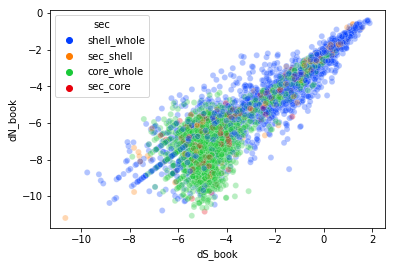

In [63]:
grid = sns.scatterplot(data=master_table2, x=np.log2(master_table2.dS_book), y=np.log2(master_table2.dN_book), hue="sec", palette="bright", alpha=0.3)



#with ratio correction (74.5%:25.5%)
#could also get the real ratio instead of this?

/home/tian/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


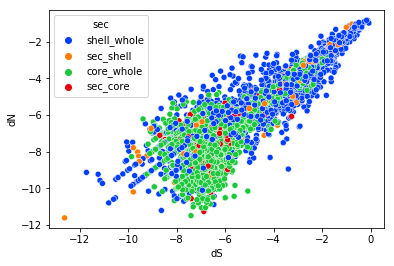

In [292]:
g = sns.scatterplot(data=master_table2, x=np.log2(master_table2.dS), y=np.log2(master_table2.dN), hue="sec", palette="bright")
#no ratio correction
#missing all cloud genes

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

shell_whole vs. sec_shell: Mann-Whitney-Wilcoxon test two-sided, P_val:1.866e-01 U_stat=1.833e+05
core_whole vs. sec_core: Mann-Whitney-Wilcoxon test two-sided, P_val:9.097e-05 U_stat=1.665e+05
shell_whole vs. core_whole: Mann-Whitney-Wilcoxon test two-sided, P_val:1.776e-09 U_stat=2.781e+06
sec_shell vs. sec_core: Mann-Whitney-Wilcoxon test two-sided, P_val:5.832e-01 U_stat=1.513e+04


(<matplotlib.axes._subplots.AxesSubplot at 0x7f010bae0438>,
  <statannotations.Annotation.Annotation at 0x7f010bbd04a8>])

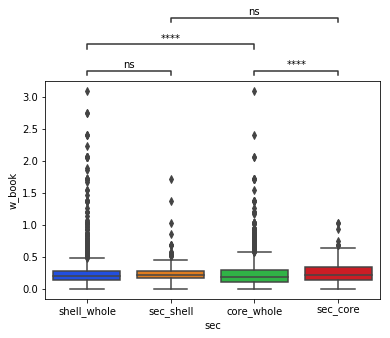

In [197]:


order = ["shell_whole", "sec_shell", "core_whole", "sec_core"]


ax = sns.boxplot(data=master_table2, x="sec", y="w_book", palette="bright", order=order)

pairs=[("shell_whole", "sec_shell"), ("shell_whole", "core_whole"), ("sec_shell", "sec_core"), ("core_whole", "sec_core")]

annotator = Annotator(ax, pairs, data=master_table2, x="sec", y="w_book", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()




In [204]:
master_table2.ratio.mean()

0.7250705556411962

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

shell_whole vs. sec_shell: Mann-Whitney-Wilcoxon test two-sided, P_val:7.128e-08 U_stat=1.479e+05
core_whole vs. sec_core: Mann-Whitney-Wilcoxon test two-sided, P_val:2.895e-03 U_stat=1.751e+05
shell_whole vs. core_whole: Mann-Whitney-Wilcoxon test two-sided, P_val:0.000e+00 U_stat=6.029e+05
sec_shell vs. sec_core: Mann-Whitney-Wilcoxon test two-sided, P_val:2.421e-29 U_stat=4.832e+03


(<matplotlib.axes._subplots.AxesSubplot at 0x7f010b671fd0>,
  <statannotations.Annotation.Annotation at 0x7f010ba75b00>])

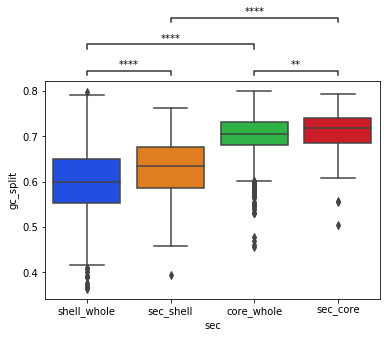

In [198]:


order = ["shell_whole", "sec_shell", "core_whole", "sec_core"]


ax = sns.boxplot(data=master_table2, x="sec", y="gc_split", palette="bright", order=order)

pairs=[("shell_whole", "sec_shell"), ("shell_whole", "core_whole"), ("sec_shell", "sec_core"), ("core_whole", "sec_core")]

annotator = Annotator(ax, pairs, data=master_table2, x="sec", y="gc_split", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

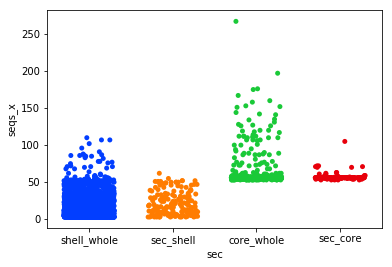

In [ ]:
maste

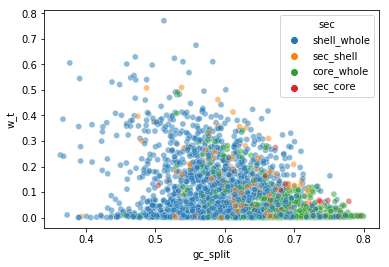

In [65]:
gc3 = sns.scatterplot(data=master_table2, x="gc_split", y="w_t", hue="sec", alpha=0.5)
#gc vs waterson's theta

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

shell_whole vs. sec_shell: Mann-Whitney-Wilcoxon test two-sided, P_val:3.457e-01 U_stat=2.030e+05
core_whole vs. sec_core: Mann-Whitney-Wilcoxon test two-sided, P_val:1.100e-05 U_stat=1.621e+05
shell_whole vs. core_whole: Mann-Whitney-Wilcoxon test two-sided, P_val:6.704e-209 U_stat=3.860e+06
sec_shell vs. sec_core: Mann-Whitney-Wilcoxon test two-sided, P_val:1.266e-08 U_stat=2.113e+04


(<matplotlib.axes._subplots.AxesSubplot at 0x7f0122c4bf98>,
  <statannotations.Annotation.Annotation at 0x7f010b630ac8>])

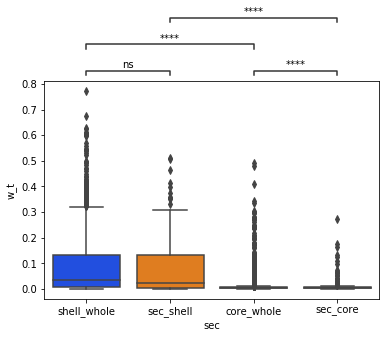

In [200]:

order = ["shell_whole", "sec_shell", "core_whole", "sec_core"]


ax = sns.boxplot(data=master_table2, x="sec", y="w_t", palette="bright", order=order)

pairs=[("shell_whole", "sec_shell"), ("shell_whole", "core_whole"), ("sec_shell", "sec_core"),  ("core_whole", "sec_core")]

annotator = Annotator(ax, pairs, data=master_table2, x="sec", y="w_t", order=order)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

In [ ]:
ks_2samp()

In [11]:
cd /media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/core/codon_seqs

/media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/core/codon_seqs


In [27]:
abridged = pd.read_csv("abridged_master.tab.csv", sep="\t", header=0, index_col=0)
abridged

rTC        rAG        rTA        rCG       rTG   dN_book  \
ID                                                                       
12       2.480540   4.376970   4.024560   4.885540  3.362650  0.022677   
24       3.862650   2.142690   0.574736   0.650290  1.349440  0.008480   
30       0.057421   0.631291   1.011720   0.405939  0.890656  0.009408   
38      30.000000  28.232900  20.871900  20.871900  0.010000  0.005958   
39       1.704600   1.525340   1.122850   1.130840  0.010000  0.000000   
...           ...        ...        ...        ...       ...       ...   
135606   0.993946   0.983192   0.963451   1.047110  1.013140  0.406349   
137634   4.036600  24.690100   1.512390   1.599870  2.083540  0.036008   
137680   0.933998   0.829131   0.818546   0.821509  0.692312  0.323671   
138393   1.264360   2.256290   0.849919   1.041590  0.309911  0.098124   
139269   0.784486   0.564810   0.831527   0.892870  1.021680  0.426006   

         dS_book       w_t  gc_split class   locale    phylo          sec  
ID                                                                         
12      0.050663  0.009938  0.608180     X      all      all  shell_whole  
24      0.356121  0.037640  0.628338     O      all      all  shell_whole  
30      0.054970  0.007009  0.541454     Z      NaN      NaN  shell_whole  
38      0.021759  0.003329  0.704724     R      all  spn_isr  shell_whole  
39      0.025122  0.002135  0.702020     P      all  spn_isr  shell_whole  
...          ...       ...       ...   ...      ...      ...          ...  
135606  1.698889  0.245316  0.362938     M  irn_isr  spn_isr  shell_whole  
137634  0.350662  0.038748  0.759563     G   israel     iran  shell_whole  
137680  1.613128  0.217494  0.563239     R   israel     iran  shell_whole  
138393  0.441039  0.061856  0.687285     V   israel     iran  shell_whole  
139269  1.582382  0.240294  0.367554     S  irn_isr  spn_isr  shell_whole  

[4845 rows x 13 columns]

In [36]:
import cor

ModuleNotFoundError: No module named 'cor'

In [38]:
shorter.corr()

####
Eigenvalues for unconstrained axes:
   PC1    PC2    PC3    PC4    PC5    PC6    PC7    PC8    PC9 
220.93  36.44  28.58  11.80   2.15   0.26   0.00   0.00   0.00 
######

rTC       rAG       rCG       rTA       rTG   dN_book  \
rTC       1.000000  0.657777  0.670680  0.656904  0.149606 -0.308153   
rAG       0.657777  1.000000  0.637206  0.618562  0.154760 -0.306962   
rCG       0.670680  0.637206  1.000000  0.944983  0.072287 -0.198650   
rTA       0.656904  0.618562  0.944983  1.000000  0.104601 -0.201322   
rTG       0.149606  0.154760  0.072287  0.104601  1.000000 -0.077973   
dN_book  -0.308153 -0.306962 -0.198650 -0.201322 -0.077973  1.000000   
dS_book  -0.324695 -0.326936 -0.212881 -0.214979 -0.087626  0.967898   
w_t      -0.306416 -0.307644 -0.200055 -0.203094 -0.081756  0.944263   
gc_split  0.265456  0.300320  0.099954  0.102989  0.051485 -0.471212   

           dS_book       w_t  gc_split  
rTC      -0.324695 -0.306416  0.265456  
rAG      -0.326936 -0.307644  0.300320  
rCG      -0.212881 -0.200055  0.099954  
rTA      -0.214979 -0.203094  0.102989  
rTG      -0.087626 -0.081756  0.051485  
dN_book   0.967898  0.944263 -0.471212  
dS_book   1.000000  0.971416 -0.494226  
w_t       0.971416  1.000000 -0.473053  
gc_split -0.494226 -0.473053  1.000000

In [28]:
shorter= abridged[['rTC', "rAG", "rCG", "rTA", 'rTG', 'dN_book', 'dS_book', 'w_t', 'gc_split']]
shorter

#variables for distance methods

rTC        rAG        rCG        rTA       rTG   dN_book  \
ID                                                                       
12       2.480540   4.376970   4.885540   4.024560  3.362650  0.022677   
24       3.862650   2.142690   0.650290   0.574736  1.349440  0.008480   
30       0.057421   0.631291   0.405939   1.011720  0.890656  0.009408   
38      30.000000  28.232900  20.871900  20.871900  0.010000  0.005958   
39       1.704600   1.525340   1.130840   1.122850  0.010000  0.000000   
...           ...        ...        ...        ...       ...       ...   
135606   0.993946   0.983192   1.047110   0.963451  1.013140  0.406349   
137634   4.036600  24.690100   1.599870   1.512390  2.083540  0.036008   
137680   0.933998   0.829131   0.821509   0.818546  0.692312  0.323671   
138393   1.264360   2.256290   1.041590   0.849919  0.309911  0.098124   
139269   0.784486   0.564810   0.892870   0.831527  1.021680  0.426006   

         dS_book       w_t  gc_split  
ID                                    
12      0.050663  0.009938  0.608180  
24      0.356121  0.037640  0.628338  
30      0.054970  0.007009  0.541454  
38      0.021759  0.003329  0.704724  
39      0.025122  0.002135  0.702020  
...          ...       ...       ...  
135606  1.698889  0.245316  0.362938  
137634  0.350662  0.038748  0.759563  
137680  1.613128  0.217494  0.563239  
138393  0.441039  0.061856  0.687285  
139269  1.582382  0.240294  0.367554  

[4845 rows x 9 columns]

In [54]:
shorter.to_csv("for_PCA_var_tab.csv", sep="\t")

In [55]:
%pwd

'/media/tian/Backup_Protected/working/halo_pg/shared_content/all_divisions/core/codon_seqs'

In [29]:
shorter[shorter.isna().any(axis=1)]


Empty DataFrame
Columns: [rTC, rAG, rCG, rTA, rTG, dN_book, dS_book, w_t, gc_split]
Index: []

In [16]:
dist_obj = squareform(pdist(shorter))

In [21]:
king = np.nan_to_num(pairwise_dist)

In [30]:
pairwise_dist = pd.DataFrame(squareform(pdist(shorter)), columns= shorter.index, index=shorter.index)
pairwise_dist
#distance mat (euclidean)

ID         12         24         30         38         39         40      \
ID                                                                         
12       0.000000   6.394416   7.427049  43.325205   6.519345  11.583908   
24       6.394416   0.000000   4.162262  46.761752   2.734973  14.158270   
30       7.427049   4.162262   0.000000  49.724164   2.202883  17.482369   
38      43.325205  46.761752  49.724164   0.000000  47.892149  33.956426   
39       6.519345   2.734973   2.202883  47.892149   0.000000  15.913715   
...           ...        ...        ...        ...        ...        ...   
135606   6.806704   3.474256   2.092376  48.758806   2.231231  16.508266   
137634  20.830296  22.599862  24.451912  37.911268  23.384344  20.471725   
137680   7.175063   3.541047   1.904804  49.021618   2.103458  16.816170   
138393   6.349561   2.844782   2.246334  47.905325   1.042546  15.978808   
139269   7.186514   3.739536   1.846886  49.230610   2.389424  16.918667   

ID         41         42         119        121     ...     130235     130718  \
ID                                                  ...                         
12      39.261111   5.209942   5.865134   5.837917  ...   5.793579   6.817869   
24      42.487842   2.312575   2.160222   3.071373  ...   2.977329   3.523140   
30      45.520722   3.382103   2.794034   1.836115  ...   2.683755   1.115272   
38       6.571647  46.455208  47.329923  48.225352  ...  47.491520  48.974009   
39      43.664940   1.577701   1.505040   1.872013  ...   1.682816   1.523087   
...           ...        ...        ...        ...  ...        ...        ...   
135606  44.529910   2.941955   1.979223   1.799610  ...   1.422633   1.814664   
137634  36.709043  22.187398  22.413760  23.722518  ...  23.256712  24.290668   
137680  44.786335   3.045011   2.092298   1.969776  ...   1.601015   1.722065   
138393  43.776524   1.611841   0.987550   1.920907  ...   1.583814   1.816085   
139269  44.979552   3.299065   2.371738   1.898927  ...   1.843255   1.696608   

ID         131021     131383     131480     135606     137634     137680  \
ID                                                                         
12       5.467472   4.937441  33.901282   6.806704  20.830296   7.175063   
24       2.859911   7.630040  36.451275   3.474256  22.599862   3.541047   
30       2.274610   9.437492  39.733292   2.092376  24.451912   1.904804   
38      47.787799  43.792781  13.551611  48.758806  37.911268  49.021618   
39       1.949191   8.993937  37.822988   2.231231  23.384344   2.103458   
...           ...        ...        ...        ...        ...        ...   
135606   1.887252   8.838353  38.712956   0.000000  23.982967   0.507186   
137634  23.493746  21.440690  33.304294  23.982967   0.000000  24.160750   
137680   2.131521   9.229531  38.949570   0.507186  24.160750   0.000000   
138393   1.984781   8.799974  38.001804   2.004346  22.690862   1.950858   
139269   2.086117   9.122553  39.143992   0.523632  24.424585   0.506156   

ID         138393     139269  
ID                            
12       6.349561   7.186514  
24       2.844782   3.739536  
30       2.246334   1.846886  
38      47.905325  49.230610  
39       1.042546   2.389424  
...           ...        ...  
135606   2.004346   0.523632  
137634  22.690862  24.424585  
137680   1.950858   0.506156  
138393   0.000000   2.272596  
139269   2.272596   0.000000  

[4845 rows x 4845 columns]

In [7]:
import ecopy as ep

In [39]:
nMDS_all = ep.MDS(pairwise_dist, transform='absolute', maxiter=100)

Finished at iteration 19. Stress = 0.07655804581285262
Finished at iteration 100. Stress = 0.12555932358573807
Finished at iteration 9. Stress = 0.3634103320327672
Finished at iteration 8. Stress = 0.36378610908278264
Finished at iteration 8. Stress = 0.3638966811330282
Finished at iteration 100. Stress = 0.12007934156802226
Finished at iteration 8. Stress = 0.36369099205497
Finished at iteration 7. Stress = 0.363914908327944
Finished at iteration 100. Stress = 0.11125647596538984
Finished at iteration 88. Stress = 0.12947619338600358
Finished at iteration 8. Stress = 0.3636501389255369
Finished at iteration 100. Stress = 0.1234678410639521
Finished at iteration 100. Stress = 0.12535617412587494
Finished at iteration 7. Stress = 0.3638928882054071
Finished at iteration 100. Stress = 0.12146605819741414
Finished at iteration 87. Stress = 0.13038070217156608
Finished at iteration 100. Stress = 0.12324937765475669
Finished at iteration 97. Stress = 0.12706478162258353
Finished at iteratio

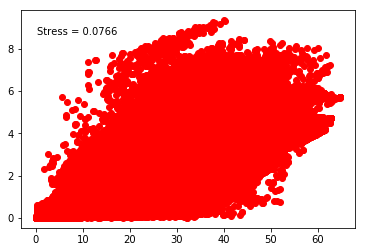

In [40]:
nMDS_all.shepard()

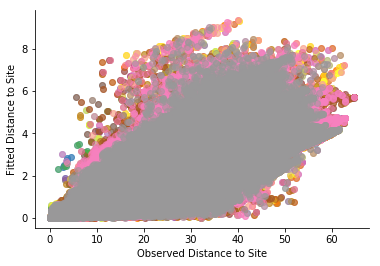

In [45]:
nMDS_all.correlationPlots()

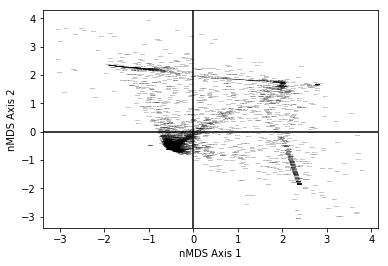

In [49]:
nMDS_all.biplot(siteSize=0.1)


In [78]:
locale_list = list(veg_master.locale)
locale_list

['all',
 'all',
 nan,
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'spn_irn',
 'all',
 'iran',
 'all',
 'all',
 nan,
 nan,
 'spn_irn',
 nan,
 'all',
 'all',
 'irn_isr',
 'all',
 'all',
 'all',
 'all',
 nan,
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 nan,
 'all',
 'irn_isr',
 'irn_isr',
 'all',
 'all',
 'all',
 'all',
 nan,
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'irn_isr',
 'all',
 'spn_irn',
 nan,
 'all',
 nan,
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'spn_irn',
 nan,
 'irn_isr',
 nan,
 'all',
 nan,
 'irn_isr',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 nan,
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 nan,
 'all',
 'all',
 nan,
 nan,
 'all',
 nan,
 'all',
 'all',
 'all',
 nan,
 'all',
 nan,
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all',
 'all

## Data expo

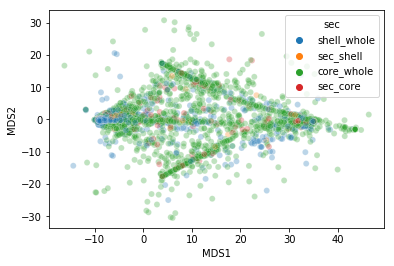

In [80]:
veggie = sns.scatterplot(data=veg_master, x="MDS1", y="MDS2", alpha=0.3, hue="sec")
#3-4 kind of "profiles" in core?

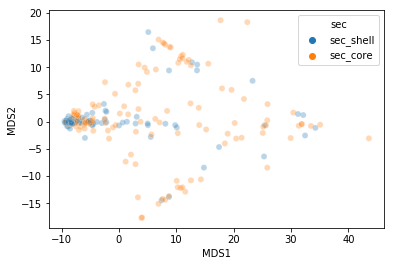

In [146]:
sns.scatterplot(data=no_sec_core_vm, x="MDS1", y="MDS2", alpha=0.3, hue="sec")
#only secretion, core more "ordered"

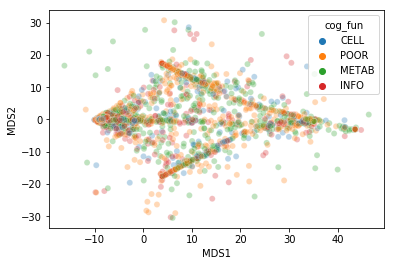

In [160]:
veggie43 = sns.scatterplot(data=no_sec_core_vm, x="MDS1", y="MDS2", alpha=0.3, hue="cog_fun")
#only core (the left arrow is where the boring stuff is)
#separated on classes

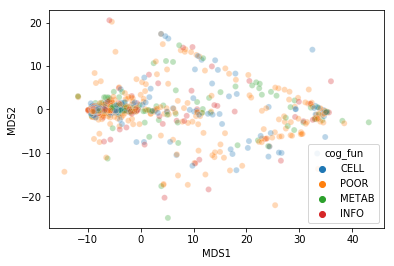

In [162]:
sns.scatterplot(data=shell_only_vm, x="MDS1", y="MDS2", alpha=0.3, hue="cog_fun")
#shell only

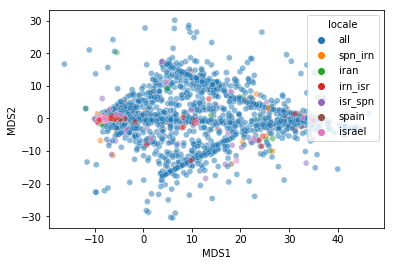

In [83]:
veggie2 = sns.scatterplot(data=veg_master, x="MDS1", y="MDS2", alpha=0.5, hue="locale")

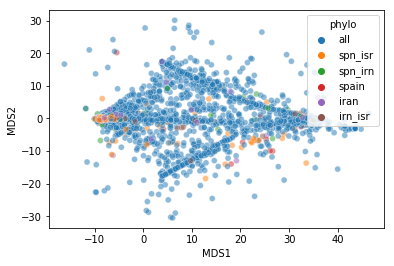

In [84]:
veggie2 = sns.scatterplot(data=veg_master, x="MDS1", y="MDS2", alpha=0.5, hue="phylo")

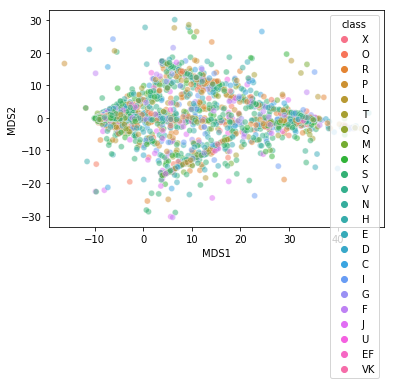

In [85]:
veggie2 = sns.scatterplot(data=veg_master, x="MDS1", y="MDS2", alpha=0.5, hue="class")
#everything

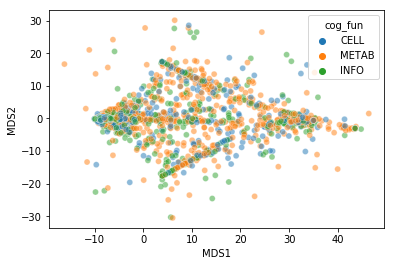

In [121]:
 veggie4 = sns.scatterplot(data=no_poor_veg_master, x="MDS1", y="MDS2", alpha=0.5, hue="cog_fun")
    #unknowns gone

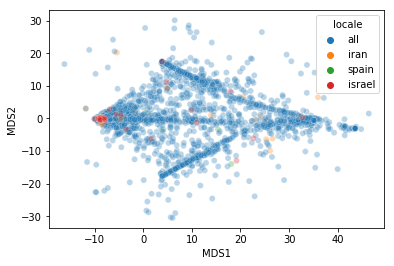

In [135]:
 veggie5 = sns.scatterplot(data=locales_veggie, x="MDS1", y="MDS2", alpha=0.3, hue="locale")
    #single or all only

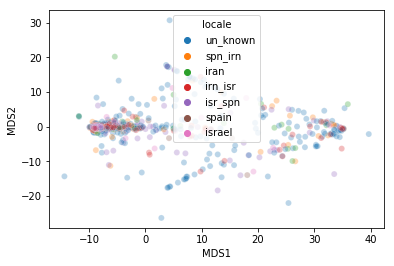

In [137]:
 veggie5 = sns.scatterplot(data=no_all_locales_veggie, x="MDS1", y="MDS2", alpha=0.3, hue="locale")
    #all omitted

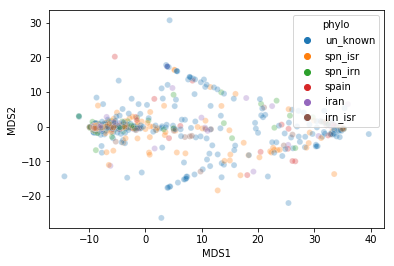

In [142]:
 veggie6 = sns.scatterplot(data=no_phylo_vm, x="MDS1", y="MDS2", alpha=0.3, hue="phylo")
    #all omitted

In [157]:
no_sec_core_vm

ID        Ka        Ks     Ka/Ks          P-val  Div-time       rTC  \
32      279  0.656890  1.999700  0.328494   0.000000e+00  1.000000  1.163000   
45      658  0.911932  1.667510  0.546881   0.000000e+00  1.000000  1.159120   
111    1390  0.963830  1.152940  0.835974  1.972080e-233  1.000000  0.992975   
155    1609  0.957214  1.159470  0.825565  2.846390e-102  1.000000  1.411610   
157    1611  0.627930  2.301460  0.272840   0.000000e+00  1.000000  1.065070   
...     ...       ...       ...       ...            ...       ...       ...   
4637  77370  0.231741  3.280570  0.070641   0.000000e+00  1.000000  0.535755   
4639  77372  1.034850  0.928692  1.114310   5.514560e-35  1.000000  1.077160   
4640  77373  0.926251  1.313170  0.705353  4.604300e-139  1.000000  0.670513   
4642  77375  0.002083  0.304997  0.006829  8.345660e-280  0.047365  6.169280   
4643  77376  0.005585  0.485796  0.011497   0.000000e+00  0.053834  1.916230   

           rAG       rTA       rCG  ...                 pfam      cdd  \
32    0.929124  0.335317  0.507604  ...            pfam13551      NaN   
45    0.870659  0.758980  0.997422  ...                  NaN      NaN   
111   0.848755  0.777257  0.864882  ...            pfam00005  cd03257   
155   1.186010  0.458667  0.985319  ...                  NaN      NaN   
157   1.398830  0.193763  0.697430  ...                  NaN      NaN   
...        ...       ...       ...  ...                  ...      ...   
4637  1.344630  0.516407  0.610894  ...                  NaN      NaN   
4639  1.078030  0.899865  1.063850  ...                  NaN      NaN   
4640  1.298150  1.442090  1.021420  ...                  NaN      NaN   
4642  6.234980  4.504890  4.619580  ...  pfam00072,pfam01339  cd00156   
4643  1.598190  0.064838  0.207735  ...  pfam04509,pfam04509      NaN   

           tigr    locale  counts     phylo   ghID_y      MDS1      MDS2  \
32          NaN       all     NaN       all    279.0 -8.911908 -0.027918   
45          NaN       all     NaN       all    658.0 -8.660505 -0.221504   
111   TIGR02769       all     NaN       all   1390.0 -8.820720 -0.372645   
155         NaN       all     NaN       all   1609.0 -8.468650 -0.327472   
157         NaN       all     NaN       all   1611.0 -8.673639  0.168216   
...         ...       ...     ...       ...      ...       ...       ...   
4637        NaN       all     NaN       all  77370.0 -8.900083  0.176455   
4639        NaN       all     NaN       all  77372.0 -8.578135 -0.136640   
4640        NaN  un_known     NaN  un_known  77373.0 -8.550105  0.025530   
4642  TIGR02875       all     NaN       all  77375.0 -1.781051 -0.296086   
4643        NaN       all     NaN       all  77376.0 -8.259995  0.272443   

      cog_fun  
32       CELL  
45       POOR  
111     METAB  
155      INFO  
157      INFO  
...       ...  
4637     CELL  
4639     POOR  
4640     POOR  
4642     CELL  
4643     CELL  

[2342 rows x 56 columns]

In [161]:
#no_poor_veg_master = veg_master[~veg_master["cog_fun"].str.contains("POOR")]
shell_only_vm = veg_master[veg_master["sec"].str.contains("shell_whole")]

In [114]:
for indy, row in veg_master.iterrows():
    veg_master.at[indy, 'cog_fun'] = arcog_classes[row['class']]

In [110]:
veg_master.cog_fun

0        CELL
1        CELL
2        POOR
3        POOR
4       METAB
        ...  
4843     CELL
4844    METAB
4845     POOR
4846     CELL
4847     POOR
Name: cog_fun, Length: 4848, dtype: object

In [104]:
veg_master['class'].unique()

array(['X', 'O', 'S', 'R', 'P', 'L', 'T', 'Q', 'M', 'K', 'V', 'N', 'H',
       'E', 'D', 'C', 'I', 'G', 'F', 'J', 'U', 'EF', 'VK'], dtype=object)

## Functions

In [113]:
arcog_classes = {"J":"INFO", "A":"INFO", "K":"INFO", "L":"INFO", "B":"INFO", "D":"CELL", "Y":"CELL",
                 "V":"CELL", "T":"CELL", "M":"CELL", "N":"CELL", "Z":"CELL", "W":"CELL", "U":"CELL",
                 "O":"CELL", "X":"CELL", "C":"METAB", "G":"METAB", "E":"METAB", "F":"METAB", "H":"METAB",
                 "I":"METAB", "P":"METAB", "Q":"METAB", "R":"POOR", "S":"POOR", "EF":"METAB", "VK":"CELL"}

#veg_master.fillna(value={"class":"S"}, inplace=True)

In [126]:
veg_master.fillna(value={"locale":"un_known", "phylo":"un_known"}, inplace=True)

In [99]:
veg_master["cog_fun"] = ""


In [261]:
big_dog1['ID'] = big_dog1['ID'].astype(str)
anno_tab['ghID'] = anno_tab['ghID'].astype(str)

master_table = big_dog1.merge(anno_tab, left_on="ID", right_on="ghID")
master_table

ID        Ka        Ks     Ka/Ks         P-val  Div-time        rTC  \
0         12  0.014215  0.014993  0.948084  7.687230e-01  0.014374   2.480540   
1         24  0.007571  0.907414  0.008343  0.000000e+00  0.095324   3.862650   
2         38  0.000867  0.015545  0.055802  1.150000e-11  0.003203  30.000000   
3         39  0.000021  0.020670  0.001000  0.000000e+00  0.003863   1.704600   
4         40  0.000110  0.005420  0.020361  0.000000e+00  0.001038  12.914500   
...      ...       ...       ...       ...           ...       ...        ...   
4177  135606  0.984885  1.051400  0.936736  5.208010e-03  1.000000   0.993946   
4178  137634  0.010728  0.287551  0.037309  6.500000e-09  0.048346   4.036600   
4179  137680  1.092040  0.797800  1.368820  9.610000e-13  1.000000   0.933998   
4180  138393  0.029124  0.296437  0.098246  5.570000e-12  0.065658   1.264360   
4181  139269  1.002890  0.990335  1.012680  5.213700e-01  1.000000   0.784486   

            rAG        rTA        rCG  ...  class  gene  \
0      4.376970   4.024560   4.885540  ...      X     -   
1      2.142690   0.574736   0.650290  ...      O  SufB   
2     28.232900  20.871900  20.871900  ...      R   Gph   
3      1.525340   1.122850   1.130840  ...      P  PhnE   
4      7.928170   6.337680   6.487810  ...      P  PhnE   
...         ...        ...        ...  ...    ...   ...   
4177   0.983192   0.963451   1.047110  ...      M  RfaL   
4178  24.690100   1.512390   1.599870  ...      G     -   
4179   0.829131   0.818546   0.821509  ...      R     -   
4180   2.256290   0.849919   1.041590  ...      V  NimA   
4181   0.564810   0.831527   0.892870  ...      S     -   

                                                   info       cog       pfam  \
0                                       IS4 transposase  COG03385        NaN   
1                   Cysteine desulfurase activator SufB  COG00719  pfam01458   
2                             HAD superfamily hydrolase  COG00546  pfam13419   
3     ABC-type phosphate/phosphonate transport syste...  COG03639  pfam00528   
4     ABC-type phosphate/phosphonate transport syste...  COG03639  pfam00528   
...                                                 ...       ...        ...   
4177                    O-antigen ligase related enzyme  COG03307        NaN   
4178                                MFS family permease  COG00477  pfam07690   
4179  Membrane-bound metal-dependent hydrolase YbcI,...  COG01988        NaN   
4180  Nitroimidazol reductase NimA or a related FMN-...  COG03467  pfam12900   
4181                   Uncharacterized membrane protein  SC.00026        NaN   

          cdd       tigr   locale  counts    phylo  
0         NaN        NaN      all     NaN      all  
1         NaN  TIGR01981      all     NaN      all  
2     cd01427  TIGR03351      all     NaN  spn_isr  
3     cd06261  TIGR01097      all     NaN  spn_isr  
4     cd06261  TIGR01097      all     NaN  spn_isr  
...       ...        ...      ...     ...      ...  
4177      NaN        NaN  irn_isr     NaN  spn_isr  
4178  cd06174        NaN   israel     NaN     iran  
4179      NaN        NaN   israel     NaN     iran  
4180      NaN        NaN   israel     NaN     iran  
4181      NaN        NaN  irn_isr     NaN  spn_isr  

[4182 rows x 52 columns]

In [263]:
master_table2 = big_dog1.merge(anno_tab, left_on="ID", right_on="ghID", how="left")
master_table2

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0         12  0.014215  0.014993  0.948084   7.687230e-01  0.014374   
1         24  0.007571  0.907414  0.008343   0.000000e+00  0.095324   
2         30  0.917953  1.532060  0.599164  4.520000e-161  1.000000   
3         38  0.000867  0.015545  0.055802   1.150000e-11  0.003203   
4         39  0.000021  0.020670  0.001000   0.000000e+00  0.003863   
...      ...       ...       ...       ...            ...       ...   
4843  135606  0.984885  1.051400  0.936736   5.208010e-03  1.000000   
4844  137634  0.010728  0.287551  0.037309   6.500000e-09  0.048346   
4845  137680  1.092040  0.797800  1.368820   9.610000e-13  1.000000   
4846  138393  0.029124  0.296437  0.098246   5.570000e-12  0.065658   
4847  139269  1.002890  0.990335  1.012680   5.213700e-01  1.000000   

            rTC        rAG        rTA        rCG  ...  class  gene  \
0      2.480540   4.376970   4.024560   4.885540  ...      X     -   
1      3.862650   2.142690   0.574736   0.650290  ...      O  SufB   
2      0.057421   0.631291   1.011720   0.405939  ...    NaN   NaN   
3     30.000000  28.232900  20.871900  20.871900  ...      R   Gph   
4      1.704600   1.525340   1.122850   1.130840  ...      P  PhnE   
...         ...        ...        ...        ...  ...    ...   ...   
4843   0.993946   0.983192   0.963451   1.047110  ...      M  RfaL   
4844   4.036600  24.690100   1.512390   1.599870  ...      G     -   
4845   0.933998   0.829131   0.818546   0.821509  ...      R     -   
4846   1.264360   2.256290   0.849919   1.041590  ...      V  NimA   
4847   0.784486   0.564810   0.831527   0.892870  ...      S     -   

                                                   info       cog       pfam  \
0                                       IS4 transposase  COG03385        NaN   
1                   Cysteine desulfurase activator SufB  COG00719  pfam01458   
2                                                   NaN       NaN        NaN   
3                             HAD superfamily hydrolase  COG00546  pfam13419   
4     ABC-type phosphate/phosphonate transport syste...  COG03639  pfam00528   
...                                                 ...       ...        ...   
4843                    O-antigen ligase related enzyme  COG03307        NaN   
4844                                MFS family permease  COG00477  pfam07690   
4845  Membrane-bound metal-dependent hydrolase YbcI,...  COG01988        NaN   
4846  Nitroimidazol reductase NimA or a related FMN-...  COG03467  pfam12900   
4847                   Uncharacterized membrane protein  SC.00026        NaN   

          cdd       tigr   locale  counts    phylo  
0         NaN        NaN      all     NaN      all  
1         NaN  TIGR01981      all     NaN      all  
2         NaN        NaN      NaN     NaN      NaN  
3     cd01427  TIGR03351      all     NaN  spn_isr  
4     cd06261  TIGR01097      all     NaN  spn_isr  
...       ...        ...      ...     ...      ...  
4843      NaN        NaN  irn_isr     NaN  spn_isr  
4844  cd06174        NaN   israel     NaN     iran  
4845      NaN        NaN   israel     NaN     iran  
4846      NaN        NaN   israel     NaN     iran  
4847      NaN        NaN  irn_isr     NaN  spn_isr  

[4848 rows x 52 columns]

In [68]:
vegan

ghID       MDS1       MDS2
0         12  -4.021338   0.794722
1         24  -6.799630  -0.827848
2         30  -9.386026  -0.024758
3         38  33.218263  -1.224387
4         39  -8.013556  -0.110860
...      ...        ...        ...
4840  135606  -8.737017  -0.573330
4841  137634   4.804050  11.184058
4842  137680  -8.932843  -0.469265
4843  138393  -7.985627   0.189763
4844  139269  -9.114765  -0.481537

[4845 rows x 3 columns]

In [69]:
master_table2

ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0         12  0.014215  0.014993  0.948084   7.687230e-01  0.014374   
1         24  0.007571  0.907414  0.008343   0.000000e+00  0.095324   
2         30  0.917953  1.532060  0.599164  4.520000e-161  1.000000   
3         38  0.000867  0.015545  0.055802   1.150000e-11  0.003203   
4         39  0.000021  0.020670  0.001000   0.000000e+00  0.003863   
...      ...       ...       ...       ...            ...       ...   
4843  135606  0.984885  1.051400  0.936736   5.208010e-03  1.000000   
4844  137634  0.010728  0.287551  0.037309   6.500000e-09  0.048346   
4845  137680  1.092040  0.797800  1.368820   9.610000e-13  1.000000   
4846  138393  0.029124  0.296437  0.098246   5.570000e-12  0.065658   
4847  139269  1.002890  0.990335  1.012680   5.213700e-01  1.000000   

            rTC        rAG        rTA        rCG  ...  class  gene  \
0      2.480540   4.376970   4.024560   4.885540  ...      X     -   
1      3.862650   2.142690   0.574736   0.650290  ...      O  SufB   
2      0.057421   0.631291   1.011720   0.405939  ...    NaN   NaN   
3     30.000000  28.232900  20.871900  20.871900  ...      R   Gph   
4      1.704600   1.525340   1.122850   1.130840  ...      P  PhnE   
...         ...        ...        ...        ...  ...    ...   ...   
4843   0.993946   0.983192   0.963451   1.047110  ...      M  RfaL   
4844   4.036600  24.690100   1.512390   1.599870  ...      G     -   
4845   0.933998   0.829131   0.818546   0.821509  ...      R     -   
4846   1.264360   2.256290   0.849919   1.041590  ...      V  NimA   
4847   0.784486   0.564810   0.831527   0.892870  ...      S     -   

                                                   info       cog       pfam  \
0                                       IS4 transposase  COG03385        NaN   
1                   Cysteine desulfurase activator SufB  COG00719  pfam01458   
2                                                   NaN       NaN        NaN   
3                             HAD superfamily hydrolase  COG00546  pfam13419   
4     ABC-type phosphate/phosphonate transport syste...  COG03639  pfam00528   
...                                                 ...       ...        ...   
4843                    O-antigen ligase related enzyme  COG03307        NaN   
4844                                MFS family permease  COG00477  pfam07690   
4845  Membrane-bound metal-dependent hydrolase YbcI,...  COG01988        NaN   
4846  Nitroimidazol reductase NimA or a related FMN-...  COG03467  pfam12900   
4847                   Uncharacterized membrane protein  SC.00026        NaN   

          cdd       tigr   locale  counts    phylo  
0         NaN        NaN      all     NaN      all  
1         NaN  TIGR01981      all     NaN      all  
2         NaN        NaN      NaN     NaN      NaN  
3     cd01427  TIGR03351      all     NaN  spn_isr  
4     cd06261  TIGR01097      all     NaN  spn_isr  
...       ...        ...      ...     ...      ...  
4843      NaN        NaN  irn_isr     NaN  spn_isr  
4844  cd06174        NaN   israel     NaN     iran  
4845      NaN        NaN   israel     NaN     iran  
4846      NaN        NaN   israel     NaN     iran  
4847      NaN        NaN  irn_isr     NaN  spn_isr  

[4848 rows x 52 columns]

In [70]:
veg_master = master_table2.merge(vegan, left_on="ID", right_on="ghID", how="left" )
veg_master


ID        Ka        Ks     Ka/Ks          P-val  Div-time  \
0         12  0.014215  0.014993  0.948084   7.687230e-01  0.014374   
1         24  0.007571  0.907414  0.008343   0.000000e+00  0.095324   
2         30  0.917953  1.532060  0.599164  4.520000e-161  1.000000   
3         38  0.000867  0.015545  0.055802   1.150000e-11  0.003203   
4         39  0.000021  0.020670  0.001000   0.000000e+00  0.003863   
...      ...       ...       ...       ...            ...       ...   
4843  135606  0.984885  1.051400  0.936736   5.208010e-03  1.000000   
4844  137634  0.010728  0.287551  0.037309   6.500000e-09  0.048346   
4845  137680  1.092040  0.797800  1.368820   9.610000e-13  1.000000   
4846  138393  0.029124  0.296437  0.098246   5.570000e-12  0.065658   
4847  139269  1.002890  0.990335  1.012680   5.213700e-01  1.000000   

            rTC        rAG        rTA        rCG  ...       cog       pfam  \
0      2.480540   4.376970   4.024560   4.885540  ...  COG03385        NaN   
1      3.862650   2.142690   0.574736   0.650290  ...  COG00719  pfam01458   
2      0.057421   0.631291   1.011720   0.405939  ...       NaN        NaN   
3     30.000000  28.232900  20.871900  20.871900  ...  COG00546  pfam13419   
4      1.704600   1.525340   1.122850   1.130840  ...  COG03639  pfam00528   
...         ...        ...        ...        ...  ...       ...        ...   
4843   0.993946   0.983192   0.963451   1.047110  ...  COG03307        NaN   
4844   4.036600  24.690100   1.512390   1.599870  ...  COG00477  pfam07690   
4845   0.933998   0.829131   0.818546   0.821509  ...  COG01988        NaN   
4846   1.264360   2.256290   0.849919   1.041590  ...  COG03467  pfam12900   
4847   0.784486   0.564810   0.831527   0.892870  ...  SC.00026        NaN   

          cdd       tigr   locale  counts    phylo    ghID_y       MDS1  \
0         NaN        NaN      all     NaN      all      12.0  -4.021338   
1         NaN  TIGR01981      all     NaN      all      24.0  -6.799630   
2         NaN        NaN      NaN     NaN      NaN      30.0  -9.386026   
3     cd01427  TIGR03351      all     NaN  spn_isr      38.0  33.218263   
4     cd06261  TIGR01097      all     NaN  spn_isr      39.0  -8.013556   
...       ...        ...      ...     ...      ...       ...        ...   
4843      NaN        NaN  irn_isr     NaN  spn_isr  135606.0  -8.737017   
4844  cd06174        NaN   israel     NaN     iran  137634.0   4.804050   
4845      NaN        NaN   israel     NaN     iran  137680.0  -8.932843   
4846      NaN        NaN   israel     NaN     iran  138393.0  -7.985627   
4847      NaN        NaN  irn_isr     NaN  spn_isr  139269.0  -9.114765   

           MDS2  
0      0.794722  
1     -0.827848  
2     -0.024758  
3     -1.224387  
4     -0.110860  
...         ...  
4843  -0.573330  
4844  11.184058  
4845  -0.469265  
4846   0.189763  
4847  -0.481537  

[4848 rows x 55 columns]

In [71]:
veg_master.to_csv("veg_master.tab", sep="\t")

In [255]:
big_dog1.to_csv("theta_dnds_alltogeter.tab", sep="\t")

In [256]:
anno_tab = pd.read_csv("arcog_ckp.phylo.3.tab", sep="\t")
anno_tab

ghID  annotation       arcog class  gene  \
0     138187  arCOG11567  arCOG11567     S     -   
1      36034  arCOG11567  arCOG11567     S     -   
2      91256  arCOG11567  arCOG11567     S     -   
3      37446  arCOG00130  arCOG00130     G     -   
4     116896  arCOG00130  arCOG00130     G     -   
...      ...         ...         ...   ...   ...   
7511   95479  arCOG08887  arCOG08887     S     -   
7512   96016  arCOG10642  arCOG10642     M     -   
7513   96698  arCOG06462  arCOG06462     M     -   
7514   96702  arCOG07826  arCOG07826     M     -   
7515     968  arCOG01970  arCOG01970     P  KhtT   

                                                   info       cog  \
0                      Uncharacterized membrane protein  SC.00974   
1                      Uncharacterized membrane protein  SC.00974   
2                      Uncharacterized membrane protein  SC.00974   
3                                   MFS family permease  COG00477   
4                                   MFS family permease  COG00477   
...                                                 ...       ...   
7511                            Uncharacterized protein       NaN   
7512                      Glycosyl hydrolase familiy 32       NaN   
7513                    Glycosyltransferase, GT2 family  COG01216   
7514  Glycosyltransferase, GT2 family, fused to meth...  COG01216   
7515     K+/H+ antiporter YhaU, regulatory subunit KhtT  COG00490   

                     pfam      cdd       tigr   locale  counts    phylo  
0                     NaN      NaN        NaN   israel     NaN     iran  
1                     NaN      NaN        NaN      all     NaN  spn_isr  
2                     NaN      NaN        NaN  irn_isr     NaN  spn_isr  
3               pfam07690  cd06174        NaN    spain     NaN    spain  
4               pfam07690  cd06174        NaN   israel     NaN     iran  
...                   ...      ...        ...      ...     ...      ...  
7511                  NaN      NaN        NaN     iran     NaN    spain  
7512  pfam13385,pfam04616  cd08979        NaN  irn_isr     NaN  spn_isr  
7513            pfam13712  cd04186        NaN     iran     NaN    spain  
7514            pfam00534  cd03823  TIGR03999     iran     NaN    spain  
7515            pfam02080      NaN  TIGR03802      all     NaN      all  

[7516 rows x 13 columns]

In [171]:
def wat_correct(N):
    #n is snumber of seqs
    #this gets the N-1th harmonic number (summation), aka: sample size correction for Waterson's theta
    harmonic = 1.0
    for i in range(2,N) :
        harmonic += 1 / i
 
    return harmonic
     
